# Imports

In [1]:
import random
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import pandas as pd
from tabulate import tabulate
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Player.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Street.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Utility.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Station.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Chance.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Tax.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Go.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Jail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\FreeParking.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\GoToJail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\CommunityChest.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\MonopolyBoard.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\Strategy.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation_Classes\\src\\simulation_classes\\RandomStrategy.py"

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\src\\mcts\\MonopolyBoardMCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\src\\mcts\\Node.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\src\\mcts\\MCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\src\\mcts\\State.py"

random.seed(42)

# Game Rollouts

## Rollouts

In [184]:
def game():
    """
    This function runs a game using the MCTS algorithm.
    
    Returns
    -------
    rounds : int
        The number of rounds played in the game.
    agent : Player
        The agent player object.
    other_players : Player
        The other player object.
    properties : list
        The list of properties in the game.
    stations : list
        The list of stations in the game.
    utilities : list
        The list of utilities in the game.
    agent_wealth : int
        The wealth of the agent player.
    other_players_wealth : int
        The wealth of the other player.
    node_actions : list
        The list of actions taken by the MCTS algorithm.
    """
    node_actions = []

    # create board and add players
    board = MonopolyBoardMCTS()
    agent = Player('Agent')
    player = Player('Player')
    board.add_agent(agent)
    board.add_other_player(player)
    
    # run MCTS game
    root_state = State()
    root_state.from_monopoly_board(board)
    mcts = MCTS(root_state, max_iterations=500, exploration_weight=1, max_simulations=5)
    
    actions = 0
    max_actions = 1000
    max_rounds = 100
    pbar = tqdm(total=max_actions, desc="Running MCTS game")

    # play game until a maximum number of actions or game has ended
    while actions < max_actions and mcts.root.state.rounds < max_rounds and not mcts.root.is_terminal():
        mcts.run()
        legal_actions = [child.action for child in mcts.root.parent.children]
        node_actions.append((mcts.root.action, legal_actions, mcts.root.state.rounds, mcts.root.state.agent_wealth, mcts.root.state.other_players_wealth))
        actions += 1
        pbar.update(1)

    pbar.close()

    return mcts.root.state.rounds, mcts.root.state.agent, mcts.root.state.other_players[0], \
        mcts.root.state.properties, mcts.root.state.stations, mcts.root.state.utilities, mcts.root.state.agent_wealth, \
        mcts.root.state.other_players_wealth, node_actions

In [ ]:
random.seed(42)
num_games = 1000
node_actions_1000 = []
game_outcomes = {'Rounds': [], 'Agent': [], 'Other player(s)': [], 'Properties': [], 'Stations': [], 
                 'Utilities': [], 'Agent Wealth': [], 'Other Player(s) Wealth': []}

# Save game outcomes to dictionary
for _ in range(num_games):
    rounds, agent, other_players, properties, stations, utilities, agent_wealth, other_players_wealth, node_actions = game()
    game_outcomes['Rounds'].append(rounds)
    game_outcomes['Agent'].append(agent)
    game_outcomes['Other player(s)'].append(other_players)
    game_outcomes['Properties'].append(properties)
    game_outcomes['Stations'].append(stations)
    game_outcomes['Utilities'].append(utilities)
    game_outcomes['Agent Wealth'].append(agent_wealth)
    game_outcomes['Other Player(s) Wealth'].append(other_players_wealth)
    node_actions_1000.append(node_actions)

In [186]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_game_outcomes.json'
with open(file_path, 'w') as json_file:
    json.dump(game_outcomes, json_file, indent=4)

In [189]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_1.json'
with open(file_path, 'w') as json_file:
    json.dump(node_actions_1000[:333], json_file, indent=4)

In [190]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_2.json'
with open(file_path, 'w') as json_file:
    json.dump(node_actions_1000[333:666], json_file, indent=4)

In [191]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_3.json'
with open(file_path, 'w') as json_file:
    json.dump(node_actions_1000[666:], json_file, indent=4)

## Analysing Game Outcomes

### 5000 Games, MaxRounds=20

In [303]:
n = 5000

In [304]:
file_path = 'MCTS_BaseStrategy_MaxRounds20_5000_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

In [305]:
# Game outcomes (bankrupt, wealth)
agent_bankrupt, player_bankrupt, agent_greater_wealth, player_greater_wealth, tied = 0, 0, 0, 0, 0
for i in range(n):
    agent_wealth = game_outcomes['Agent Wealth'][i]
    player_wealth = game_outcomes['Other Player(s) Wealth'][i][0]

    if game_outcomes['Agent'][i][3]:
        agent_bankrupt += 1
    elif game_outcomes['Other player(s)'][i][3]:
        player_bankrupt += 1
    elif agent_wealth > player_wealth:
        agent_greater_wealth += 1
    elif agent_wealth < player_wealth:
        player_greater_wealth += 1
    else:
        tied += 1

print(f'Out of {n} games with 2 players, run for a maximum of 20 rounds, using a base strategy, \n\
      the agent went bankrupt in {agent_bankrupt} games, the other player went bankrupt in {player_bankrupt} games. \n\
        The agent had greater wealth in {agent_greater_wealth} games, the other player had greater wealth in \n\
            {player_greater_wealth} games. The wealth was tied in {tied} games.')

Out of 5000 games with 2 players, run for a maximum of 20 rounds, using a base strategy, 
      the agent went bankrupt in 0 games, the other player went bankrupt in 66 games. 
        The agent had greater wealth in 4637 games, the other player had greater wealth in 
            296 games. The wealth was tied in 1 games.


In [306]:
agent_bankrupt*100/n, player_bankrupt*100/n, agent_greater_wealth*100/n, player_greater_wealth*100/n, tied*100/n # Percentages for each outcome

(0.0, 1.32, 92.74, 5.92, 0.02)

In [307]:
# Difference in mean wealth over games
mean_agent_wealth = np.mean(game_outcomes['Agent Wealth'])
mean_player_wealth = np.mean(game_outcomes['Other Player(s) Wealth'])
mean_agent_wealth, mean_player_wealth

(2417.6532, 1339.091)

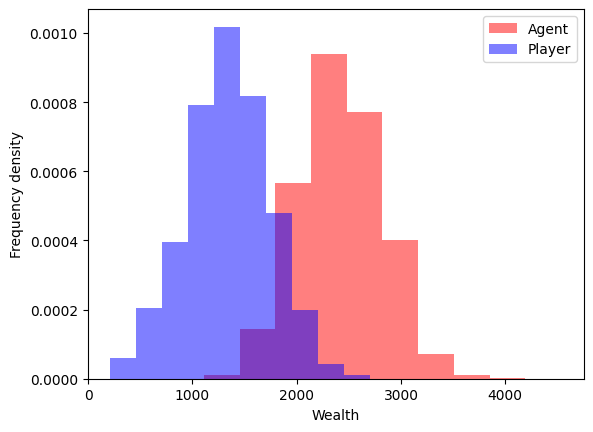

In [308]:
# Wealth histogram for agent and player
plt.hist(game_outcomes['Agent Wealth'], color = 'red', alpha = 0.5, label = 'Agent', density=True)
plt.hist([i[0] for i in game_outcomes['Other Player(s) Wealth']], color = 'blue', alpha = 0.5, label = 'Player', density=True)
plt.legend()
plt.xlabel('Wealth')
plt.ylabel('Frequency density')
plt.show()

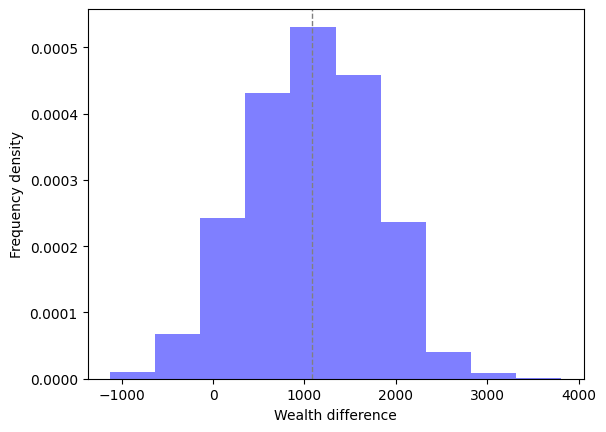

In [309]:
# Distribution of differences between player and agent wealth 
wealth_diffs = [game_outcomes['Agent Wealth'][i] - game_outcomes['Other Player(s) Wealth'][i][0] for i in range(n)]
plt.hist(wealth_diffs, color = 'blue', alpha = 0.5, density=True)
plt.axvline(np.mean(wealth_diffs), color = 'grey', linestyle = 'dashed', linewidth = 1)
plt.xlabel('Wealth difference')
plt.ylabel('Frequency density')
plt.show()

In [313]:
street_data = [
            ("Old Kent Road", 60, 50, 2, 10, 30, 90, 160, 250, 1, "brown", 2),
            ("Whitechapel Road", 60, 50, 4, 20, 60, 180, 320, 450, 3, "brown", 2),
            ("The Angel Islington", 100, 50, 6, 30, 90, 270, 400, 550, 6, "lightblue", 3),
            ("Euston Road", 100, 50, 6, 30, 90, 270, 400, 550, 8, "lightblue", 3),
            ("Pentonville Road", 120, 50, 8, 40, 100, 300, 450, 600, 9, "lightblue", 3),
            ("Pall Mall", 140, 100, 10, 50, 150, 450, 625, 750, 11, "pink", 3),
            ("Whitehall", 140, 100, 10, 50, 150, 450, 625, 750, 13, "pink", 3),
            ("Northumberland Avenue", 160, 100, 12, 60, 180, 500, 700, 900, 14, "pink", 3),
            ("Bow Street", 180, 100, 14, 70, 200, 550, 750, 950, 16, "orange", 3),
            ("Marlborough Street", 180, 100, 14, 70, 200, 550, 750, 950, 18, "orange", 3),
            ("Vine Street", 200, 100, 16, 80, 220, 600, 800, 1000, 19, "orange", 3),
            ("The Strand", 220, 150, 18, 90, 250, 700, 875, 1050, 21, "red", 3),
            ("Fleet Street", 220, 150, 18, 90, 250, 700, 875, 1050, 23, "red", 3),
            ("Trafalgar Square", 240, 150, 20, 100, 300, 750, 925, 1100, 24, "red", 3),
            ("Leicester Square", 260, 150, 22, 110, 330, 800, 975, 1150, 26, "yellow", 3),
            ("Coventry Street", 260, 150, 22, 110, 330, 800, 975, 1150, 27, "yellow", 3),
            ("Piccadilly", 280, 150, 24, 120, 360, 850, 1025, 1200, 29, "yellow", 3),
            ("Regent Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 31, "green", 3),
            ("Oxford Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 32, "green", 3),
            ("Bond Street", 320, 200, 28, 150, 450, 1000, 1200, 1400, 34, "green", 3),
            ("Park Lane", 350, 200, 35, 175, 500, 1100, 1300, 1500, 37, "darkblue", 2),
            ("Mayfair", 400, 200, 50, 200, 600, 1400, 1700, 2000, 39, "darkblue", 2)
        ]

In [314]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch Street Station",
    "Liverpool Street Station",
    "Electric Company",
    "Water Works"
]

In [315]:
props_bought_player = [0]*28
props_bought_agent = [0]*28
p = 1/n

# Calculate the proportion of times each property was bought by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx] += p
        else:
            pass

# Calculate the proportion of times each station was bought by the agent and player
for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+22] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx+22] += p
        else:
            pass

# Calculate the proportion of times each utility was bought by the agent and player
for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+26] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx+26] += p
        else:
            pass

In [316]:
def wilson_score_interval(p, n, z):
    """
    Calculate the Wilson score interval for a proportion.

    Parameters
    ----------
    p : float
        The proportion (success rate).
    n : int
        The sample size.
    z : float
        The z-score corresponding to the desired confidence level.

    Returns
    -------
    ci_lower : float
        The lower bound of the confidence interval.
    ci_upper : float
        The upper bound of the confidence interval.
    """
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    
    ci_lower = (phat - margin_of_error) / (1 + z_squared / n)
    ci_upper = (phat + margin_of_error) / (1 + z_squared / n)
    
    return ci_lower, ci_upper

In [317]:
def interval_property_plot(agent, player, ylabel, n=1000, ylim0=0, ylim1=1):
    """
    Plot the interval property plot for the agent and player.

    Parameters
    ----------
    agent : list
        The list of proportions of properties bought by the agent.
    player : list
        The list of proportions of properties bought by the player.
    ylabel : str
        The label for the y-axis.
    n : int, optional
        The sample size, by default 1000.
    ylim0 : int, optional
        The lower limit for the y-axis, by default 0.
    ylim1 : int, optional
        The upper limit for the y-axis, by default 1.

    Returns
    -------
    None
    """
    num_points = len(agent)
    ci_lower_props_bought_player = [0]*num_points
    ci_lower_props_bought_agent = [0]*num_points
    ci_upper_props_bought_player = [0]*num_points
    ci_upper_props_bought_agent = [0]*num_points

    z = norm.ppf(0.975)

    # Calculate the Wilson score interval for each property for player
    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = ci_lower
        ci_upper_props_bought_player[idx] = ci_upper

    # Calculate the Wilson score interval for each property for agent
    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper

    x = range(num_points)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5]
    for i in range(len(vertical_lines)):
        plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    if num_points > 22:
        vertical_lines = [21.5, 25.5]
        for i in range(len(vertical_lines)):
            plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.fill_between(x, ci_lower_props_bought_player, ci_upper_props_bought_player, color='lightblue', alpha=0.5)
    plt.fill_between(x, ci_lower_props_bought_agent, ci_upper_props_bought_agent, color='pink', alpha=0.5)
    plt.scatter(x, player, alpha = 0.5, color = 'blue', label = 'Player')
    plt.scatter(x, agent, alpha = 0.5, color = 'red', label = 'Agent')
        
    plt.xticks(x, property_names[:num_points], rotation = 90)
    plt.xlabel('Property')
    plt.ylabel(ylabel)
    
    plt.ylim(ylim0, ylim1)
    plt.legend()
    plt.show()

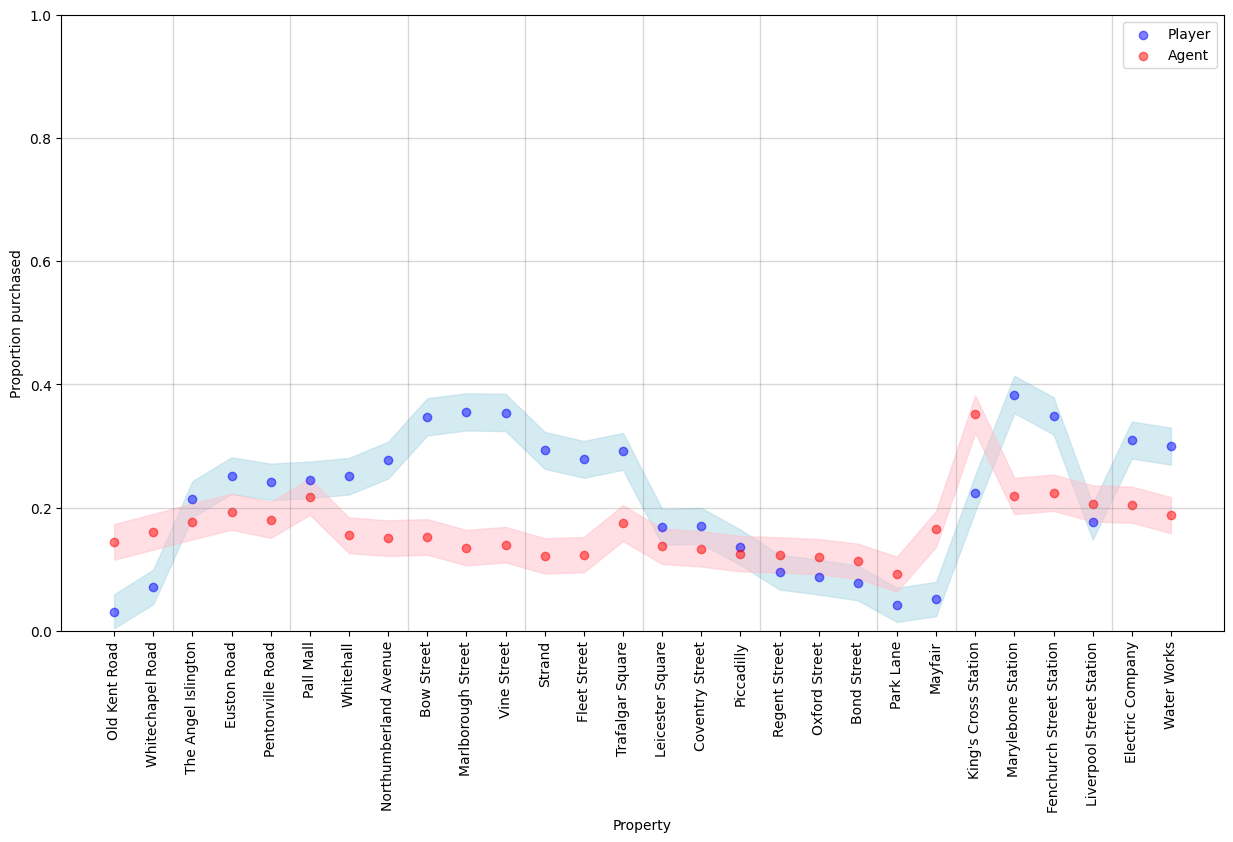

In [318]:
interval_property_plot(props_bought_agent, props_bought_player, 'Proportion purchased', n=5000)

In [319]:
def interval_whiskers_property_plot(agent, player, n=1000):
    """
    This function plots the interval whiskers for the proportion of properties bought by the player and the agent.
    
    Parameters
    ----------
    agent : list
        A list of proportions of properties bought by the agent.
    player : list
        A list of proportions of properties bought by the player.
    n : int, optional
        The number of trials used to calculate the confidence interval, by default 1000.
    
    Returns
    -------
    None
    """
    ci_lower_props_bought_player = [0]*28
    ci_lower_props_bought_agent = [0]*28
    ci_upper_props_bought_player = [0]*28
    ci_upper_props_bought_agent = [0]*28

    z = norm.ppf(0.975)

    # Calculate the Wilson score interval for each property for player
    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = p - ci_lower
        ci_upper_props_bought_player[idx] = ci_upper - p

    # Calculate the Wilson score interval for each property for agent
    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = p - ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper - p

    x = range(28)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 21.5, 25.5]
    for i in range(9):
        plt.axvline(vertical_lines[i], alpha = 0.5, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.errorbar(x, props_bought_player, yerr=[ci_lower_props_bought_player, ci_upper_props_bought_player], alpha = 0.5, fmt='o', color='blue', capsize=5, label='Player')
    plt.errorbar(x, props_bought_agent, yerr=[ci_lower_props_bought_agent, ci_upper_props_bought_agent], alpha = 0.5, fmt='o', color='red', capsize=5, label='Agent')
        
    plt.xticks(x, property_names, rotation = 90)
    plt.ylim(0, 1)
    plt.xlabel('Property')
    plt.ylabel('Proportion Purchased')
    plt.gca().xaxis.grid(False)
    plt.legend()
    plt.show()

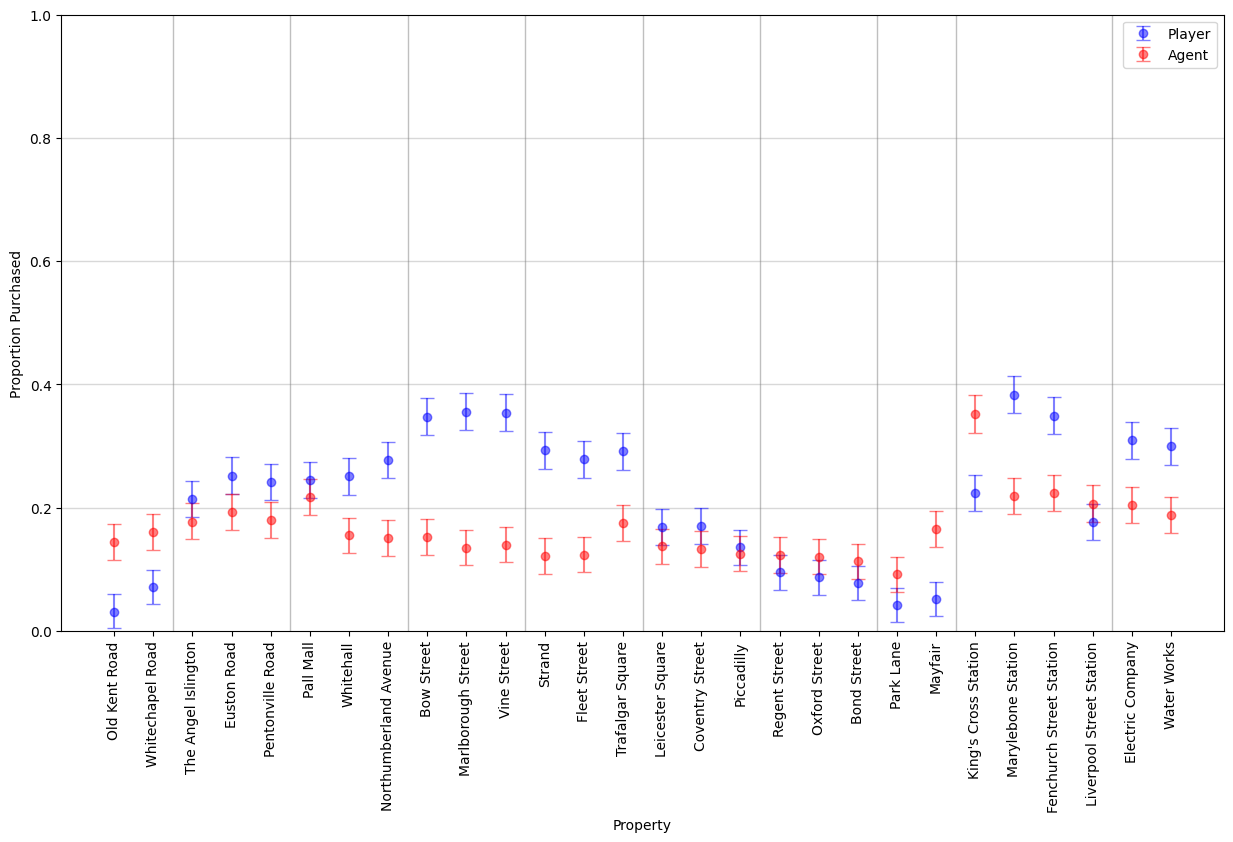

In [320]:
interval_whiskers_property_plot(props_bought_agent, props_bought_player, n=5000)

In [1]:
# theta = np.linspace(0, 2 * np.pi, len(props_bought_player), endpoint=False)

# plt.figure(figsize=(8, 8))
# plt.subplot(111, polar=True)

# plt.plot(theta, props_bought_player, 'o-', color='blue', label='Player')
# plt.plot(theta, props_bought_agent, 'o-', color='red', label='Agent')
# plt.fill(theta, props_bought_player, color='blue', alpha=0.25)
# plt.fill(theta, props_bought_agent, color='red', alpha=0.25)
# plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
# plt.legend()
# plt.show()

In [2]:
# bar_colours = ['brown', 'brown', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink',
#                 'orange', 'orange', 'orange', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 
#                'green', 'green', 'green', 'darkblue', 'darkblue', 'black', 'black', 'black',
#                 'black', 'grey', 'grey']

# theta = np.linspace(0, 2 * np.pi, len(props_bought_agent), endpoint=False)

# plt.figure(figsize=(8, 8))
# plt.subplot(111, polar=True)

# width = 2 * np.pi / len(props_bought_agent)

# for i in range(len(props_bought_agent)):
#     plt.bar(theta[i], props_bought_agent[i], width=width, color=bar_colours[i])

# plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
# plt.show()

In [323]:
num_props_bought_agent = [0] * n
num_props_bought_player = [0] * n

# Calculate the number of properties bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Properties']):
    for prop in game:
        if prop[0] == 'Agent':
            num_props_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_props_bought_player[idx] += 1
        else:
            pass

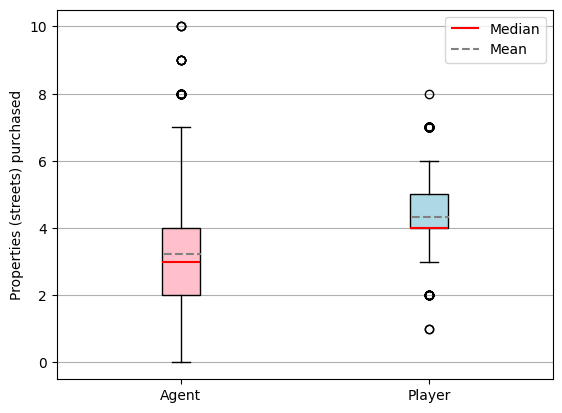

In [324]:
# Plot the boxplot for the number of properties bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_props_bought_agent, num_props_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=1.5, label='Median')
box['medians'][1].set(color='red', linewidth=1.5)

ax.set_xticks([1, 2])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_props_bought_agent), np.mean(num_props_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_props_bought_player), np.mean(num_props_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Properties (streets) purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [325]:
num_stations_bought_agent = [0] * n
num_stations_bought_player = [0] * n

# Calculate the number of stations bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Stations']):
    for prop in game:
        if prop[0] == 'Agent':
            num_stations_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_stations_bought_player[idx] += 1
        else:
            pass

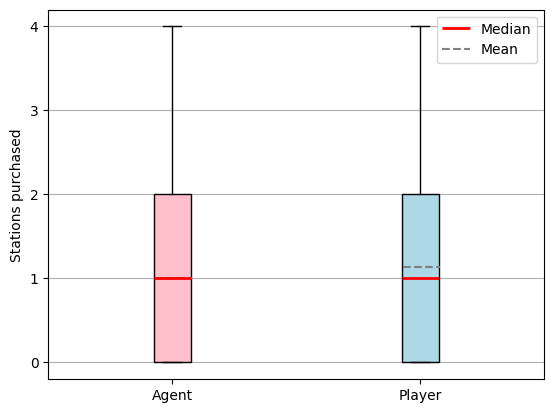

In [326]:
# Plot the boxplot for the number of stations bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_stations_bought_agent, num_stations_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_stations_bought_agent), np.mean(num_stations_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_stations_bought_player), np.mean(num_stations_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Stations purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [327]:
num_utilities_bought_agent = [0] * n
num_utilities_bought_player = [0] * n

# Calculate the number of utilities bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Utilities']):
    for prop in game:
        if prop[0] == 'Agent':
            num_utilities_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_utilities_bought_player[idx] += 1
        else:
            pass

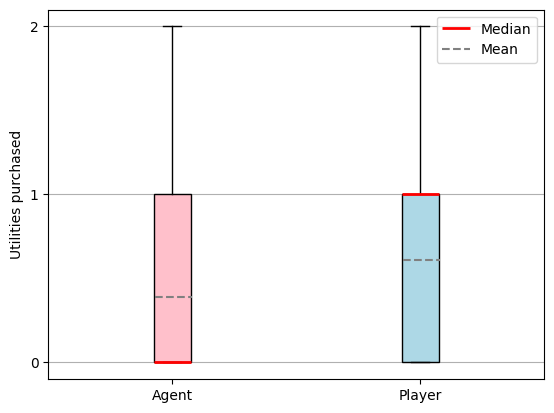

In [328]:
# Plot the boxplot for the number of utilities bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_utilities_bought_agent, num_utilities_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_utilities_bought_agent), np.mean(num_utilities_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_utilities_bought_player), np.mean(num_utilities_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Utilities purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [329]:
houses_bought_player_1 = [0]*22
houses_bought_agent_1 = [0]*22
houses_bought_player_2 = [0]*22
houses_bought_agent_2 = [0]*22
houses_bought_player_3 = [0]*22
houses_bought_agent_3 = [0]*22
houses_bought_player_4 = [0]*22
houses_bought_agent_4 = [0]*22
hotels_bought_player = [0]*22
hotels_bought_agent = [0]*22
built_player = [0]*22
built_agent = [0]*22
p = 1/n

# Calculate the proportion of times each house was bought by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            if prop[1] > 0 or prop[2]:
                built_player[idx] += p

            if prop[1] == 1:
                houses_bought_player_1[idx] += p
            elif prop[1] == 2:
                houses_bought_player_2[idx] += p
            elif prop[1] == 3:
                houses_bought_player_3[idx] += p
            elif prop[1] == 4:
                houses_bought_player_4[idx] += p
            elif prop[2]:
                hotels_bought_player[idx] += p
            else:
                pass
        elif prop[0] == 'Agent':
            if prop[1] > 0 or prop[2]:
                built_agent[idx] += p

            if prop[1] == 1:
                houses_bought_agent_1[idx] += p
            elif prop[1] == 2:
                houses_bought_agent_2[idx] += p
            elif prop[1] == 3:
                houses_bought_agent_3[idx] += p
            elif prop[1] == 4:
                houses_bought_agent_4[idx] += p
            elif prop[2]:
                hotels_bought_agent[idx] += p
            else:
                pass
        else:
            pass

In [330]:
# Normalise outcomes
houses_bought_player_1_normalised = [houses_bought_player_1[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_1_normalised = [houses_bought_agent_1[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_2_normalised = [houses_bought_player_2[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_2_normalised = [houses_bought_agent_2[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_3_normalised = [houses_bought_player_3[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_3_normalised = [houses_bought_agent_3[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_4_normalised = [houses_bought_player_4[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_4_normalised = [houses_bought_agent_4[i]/props_bought_agent[i] for i in range(22)]
hotels_bought_player_normalised = [hotels_bought_player[i]/props_bought_player[i] for i in range(22)]
hotels_bought_agent_normalised = [hotels_bought_agent[i]/props_bought_agent[i] for i in range(22)]
built_player_normalised = [built_player[i]/props_bought_agent[i] for i in range(22)]
built_agent_normalised = [built_agent[i]/props_bought_agent[i] for i in range(22)]

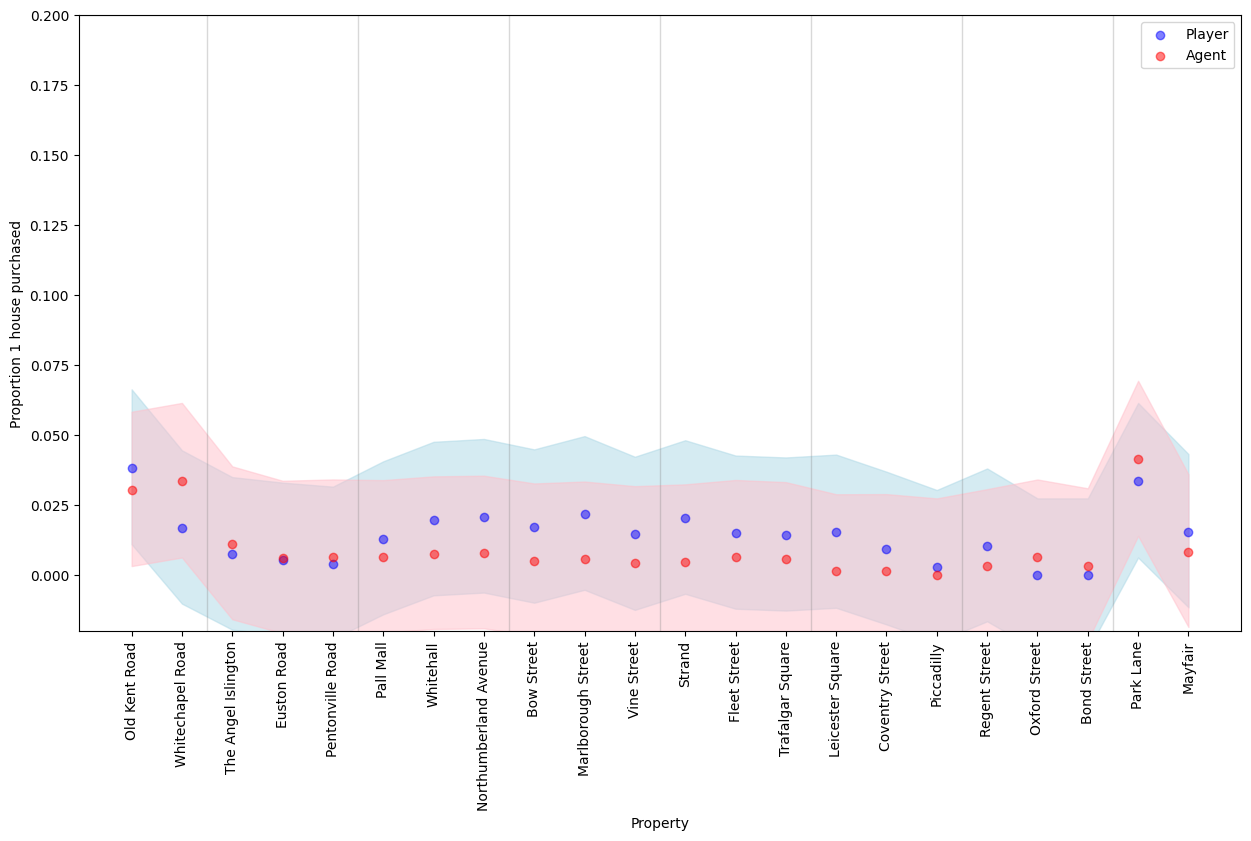

In [331]:
interval_property_plot(houses_bought_agent_1_normalised, houses_bought_player_1_normalised, 'Proportion 1 house purchased', ylim0=-0.02, ylim1=0.2, n=5000)

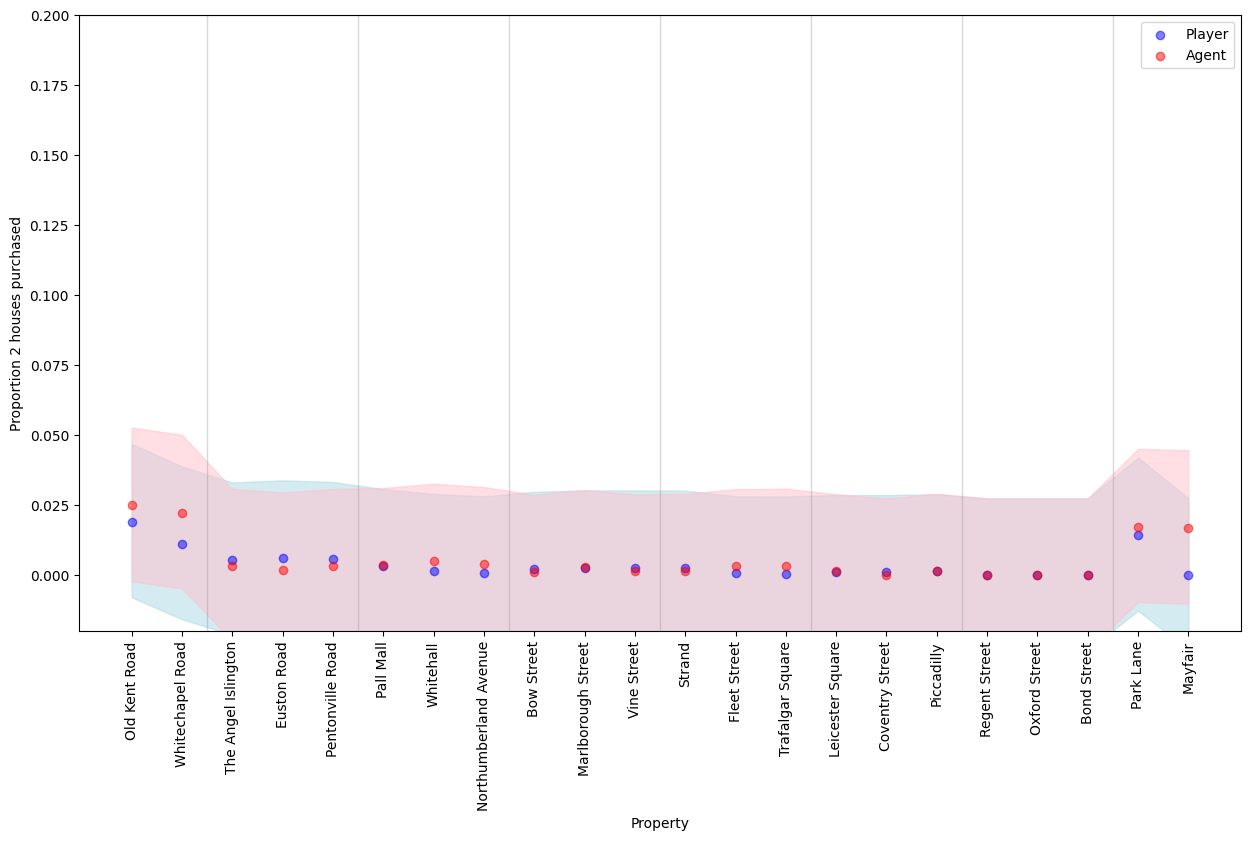

In [332]:
interval_property_plot(houses_bought_agent_2_normalised, houses_bought_player_2_normalised, 'Proportion 2 houses purchased', ylim0=-0.02, ylim1=0.2, n=5000)

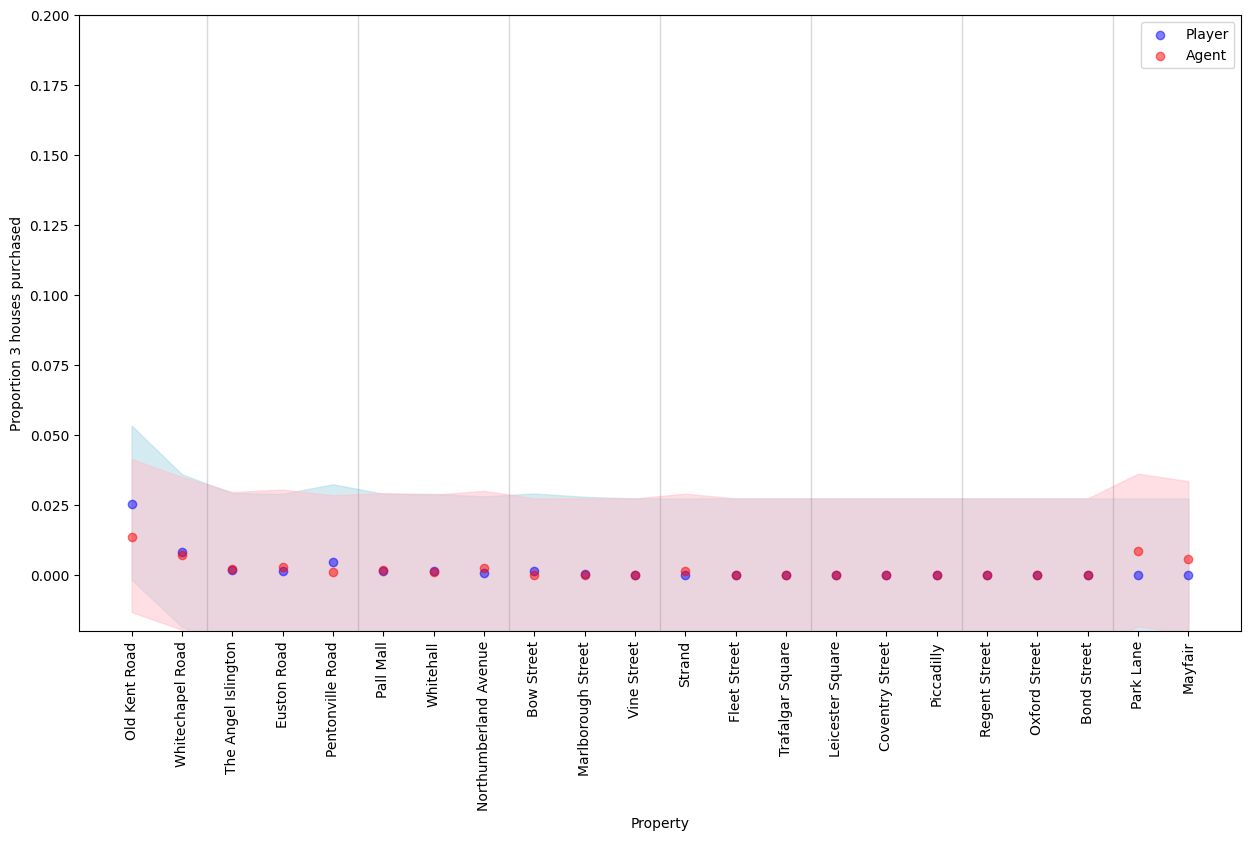

In [333]:
interval_property_plot(houses_bought_agent_3_normalised, houses_bought_player_3_normalised, 'Proportion 3 houses purchased', ylim0=-0.02, ylim1=0.2, n=5000)

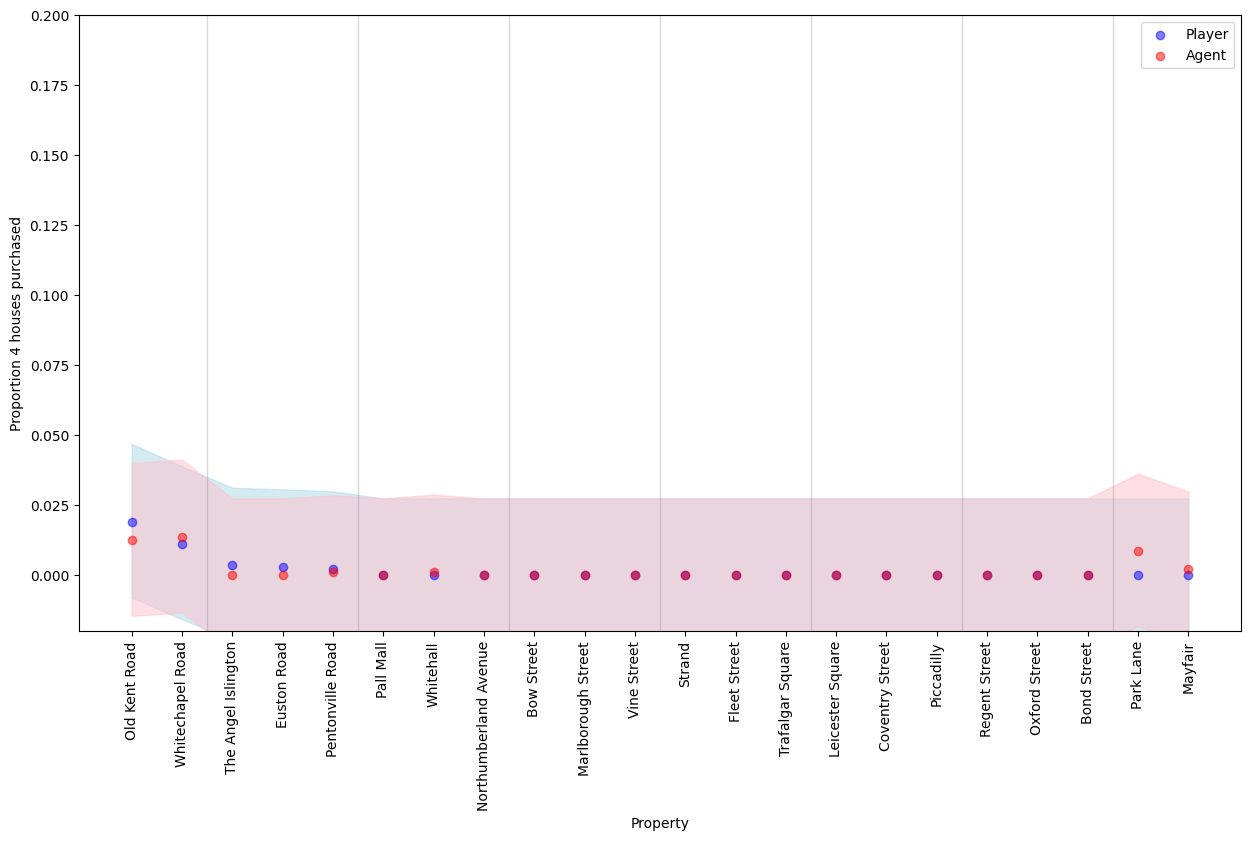

In [334]:
interval_property_plot(houses_bought_agent_4_normalised, houses_bought_player_4_normalised, 'Proportion 4 houses purchased', ylim0=-0.02, ylim1=0.2, n=5000)

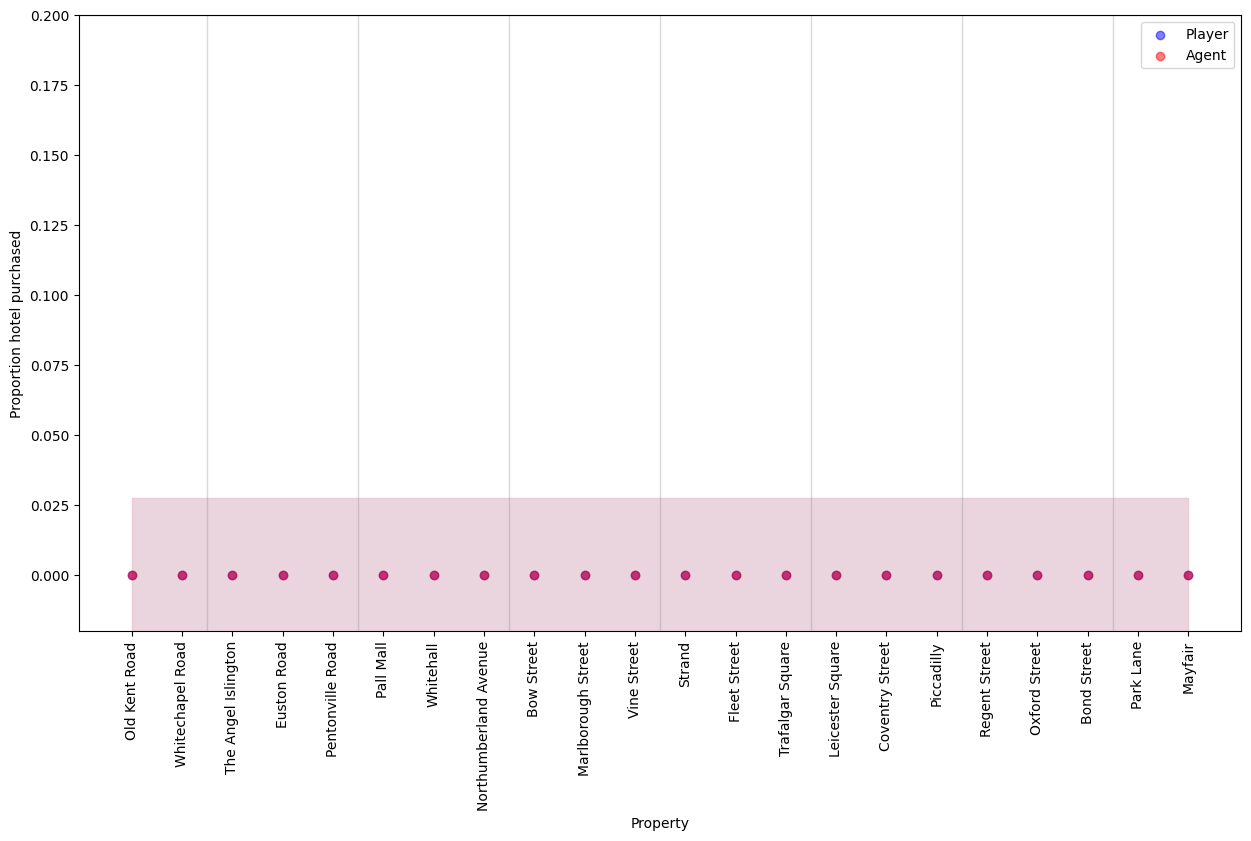

In [335]:
interval_property_plot(hotels_bought_agent_normalised, hotels_bought_player_normalised, 'Proportion hotel purchased', ylim0=-0.02, ylim1=0.2, n=5000)

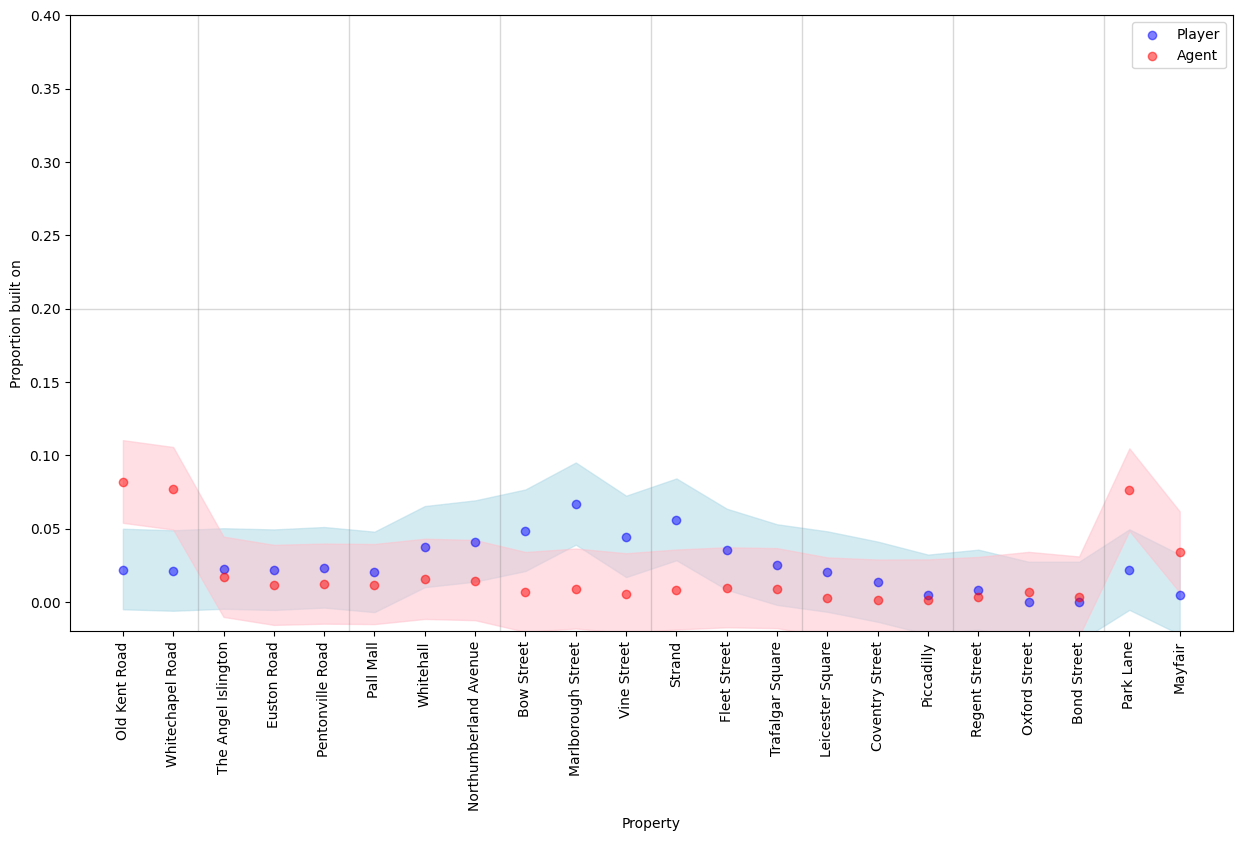

In [336]:
interval_property_plot(built_agent_normalised, built_player_normalised, 'Proportion built on', ylim0=-0.02, ylim1=0.4, n=5000)

In [337]:
mortgaged_player = [0]*28
mortgaged_agent = [0]*28
p = 1/n

# Calculate the proportion of times each property was mortgaged by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[3]:
            mortgaged_player[idx] += p
        elif prop[0] == 'Agent' and prop[3]:
            mortgaged_agent[idx] += p
        else:
            pass

# Calculate the proportion of times each station was mortgaged by the agent and player
for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+22] += p
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+22] += p
        else:
            pass

# Calculate the proportion of times each utility was mortgaged by the agent and player
for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+26] += p
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+26] += p
        else:
            pass

In [338]:
# Normalise outcomes
mortgaged_player_normalised = [mortgaged_player[i]/props_bought_agent[i] for i in range(28)]
mortgaged_agent_normalised = [mortgaged_agent[i]/props_bought_agent[i] for i in range(28)]

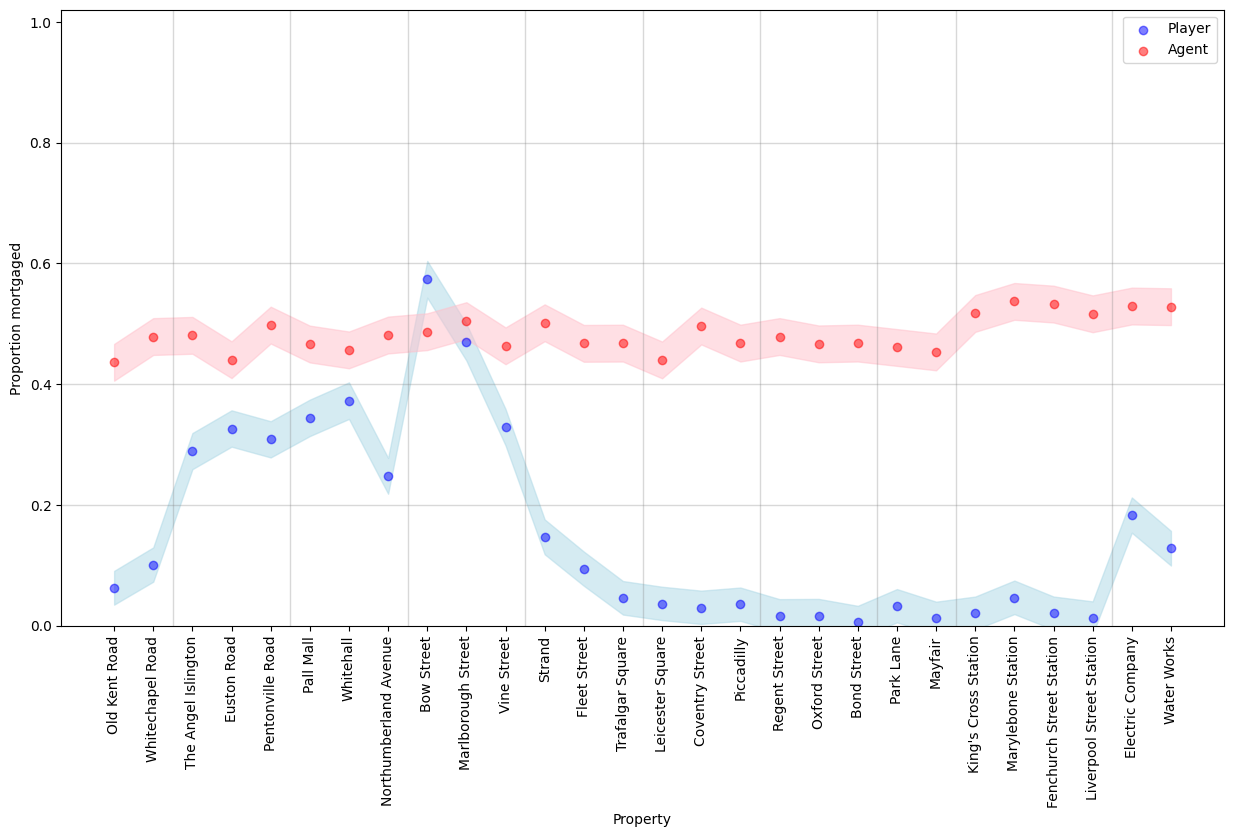

In [339]:
interval_property_plot(mortgaged_agent_normalised, mortgaged_player_normalised, 'Proportion mortgaged', ylim0=0, ylim1=1.02, n=5000)

### 1000 Games, MaxRounds=100

In [340]:
n = 1000

In [341]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

In [342]:
# Game outcomes
agent_bankrupt, player_bankrupt, agent_greater_wealth, player_greater_wealth, tied = 0, 0, 0, 0, 0
for i in range(n):
    agent_wealth = game_outcomes['Agent Wealth'][i]
    player_wealth = game_outcomes['Other Player(s) Wealth'][i][0]

    if game_outcomes['Agent'][i][3]:
        agent_bankrupt += 1
    elif game_outcomes['Other player(s)'][i][3]:
        player_bankrupt += 1
    elif agent_wealth > player_wealth:
        agent_greater_wealth += 1
    elif agent_wealth < player_wealth:
        player_greater_wealth += 1
    else:
        tied += 1

print(f'Out of {n} games with 2 players, run for a maximum of 20 rounds, using a base strategy, \n\
      the agent went bankrupt in {agent_bankrupt} games, the other player went bankrupt in {player_bankrupt} games. \n\
        The agent had greater wealth in {agent_greater_wealth} games, the other player had greater wealth in \n\
            {player_greater_wealth} games. The wealth was tied in {tied} games.')

Out of 1000 games with 2 players, run for a maximum of 20 rounds, using a base strategy, 
      the agent went bankrupt in 0 games, the other player went bankrupt in 616 games. 
        The agent had greater wealth in 173 games, the other player had greater wealth in 
            211 games. The wealth was tied in 0 games.


In [343]:
agent_bankrupt*100/n, player_bankrupt*100/n, agent_greater_wealth*100/n, player_greater_wealth*100/n, tied*100/n # Percentages for each outcome

(0.0, 61.6, 17.3, 21.1, 0.0)

In [344]:
# Difference in mean wealth over games
mean_agent_wealth = np.mean(game_outcomes['Agent Wealth'])
mean_player_wealth = np.mean(game_outcomes['Other Player(s) Wealth'])
mean_agent_wealth, mean_player_wealth

(2842.631, 1259.121)

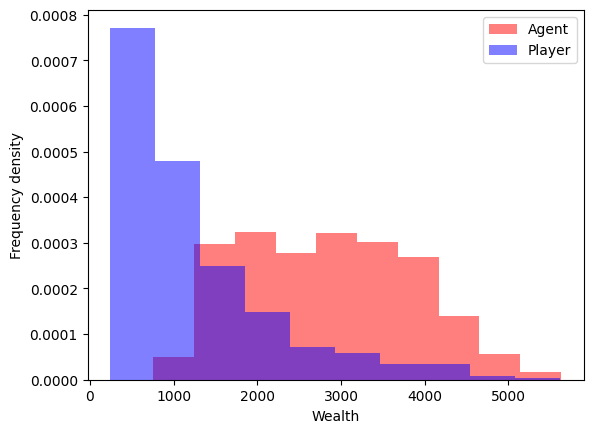

In [345]:
# Wealth histogram for agent and player
plt.hist(game_outcomes['Agent Wealth'], color = 'red', alpha = 0.5, label = 'Agent', density=True)
plt.hist([i[0] for i in game_outcomes['Other Player(s) Wealth']], color = 'blue', alpha = 0.5, label = 'Player', density=True)
plt.legend()
plt.xlabel('Wealth')
plt.ylabel('Frequency density')
plt.show()

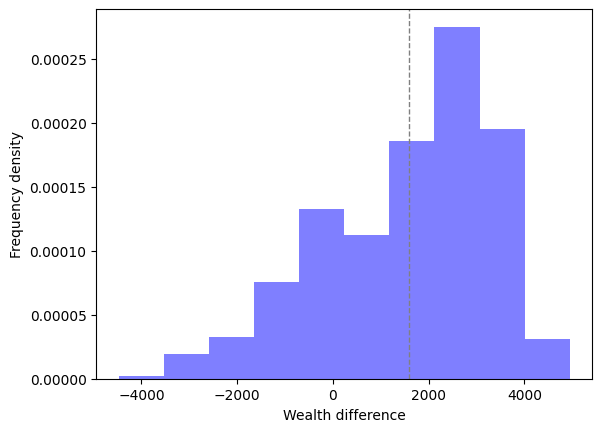

In [346]:
# Distribution of differences between player and agent wealth 
wealth_diffs = [game_outcomes['Agent Wealth'][i] - game_outcomes['Other Player(s) Wealth'][i][0] for i in range(n)]
plt.hist(wealth_diffs, color = 'blue', alpha = 0.5, density=True)
plt.axvline(np.mean(wealth_diffs), color = 'grey', linestyle = 'dashed', linewidth = 1)
plt.xlabel('Wealth difference')
plt.ylabel('Frequency density')
plt.show()

In [349]:
props_bought_player = [0]*28
props_bought_agent = [0]*28
p = 1/n

# Calculate the proportion of times each property was bought by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx] += p
        else:
            pass

# Calculate the proportion of times each station was bought by the agent and player
for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+22] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx+22] += p
        else:
            pass

# Calculate the proportion of times each utility was bought by the agent and player
for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+26] += p
        elif prop[0] == 'Agent':
            props_bought_agent[idx+26] += p
        else:
            pass

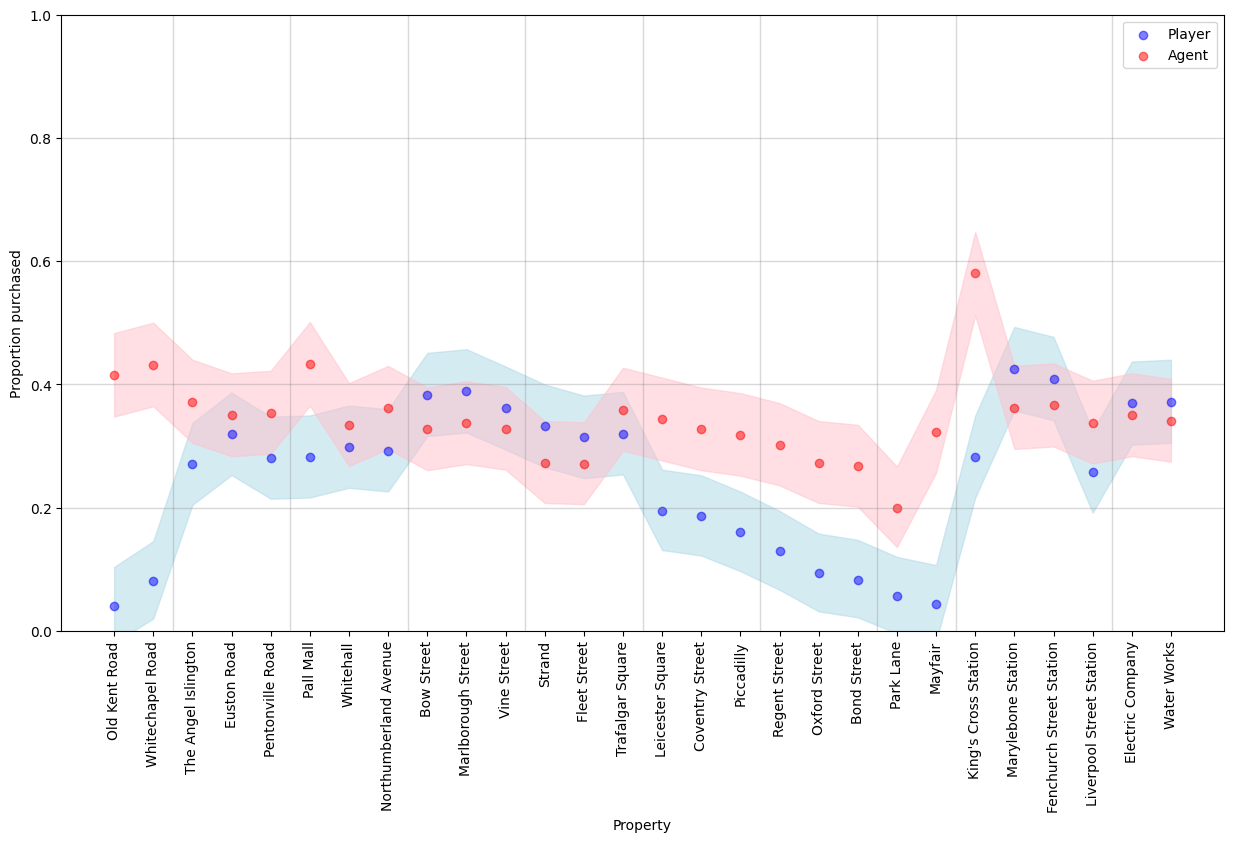

In [350]:
interval_property_plot(props_bought_agent, props_bought_player, 'Proportion purchased')

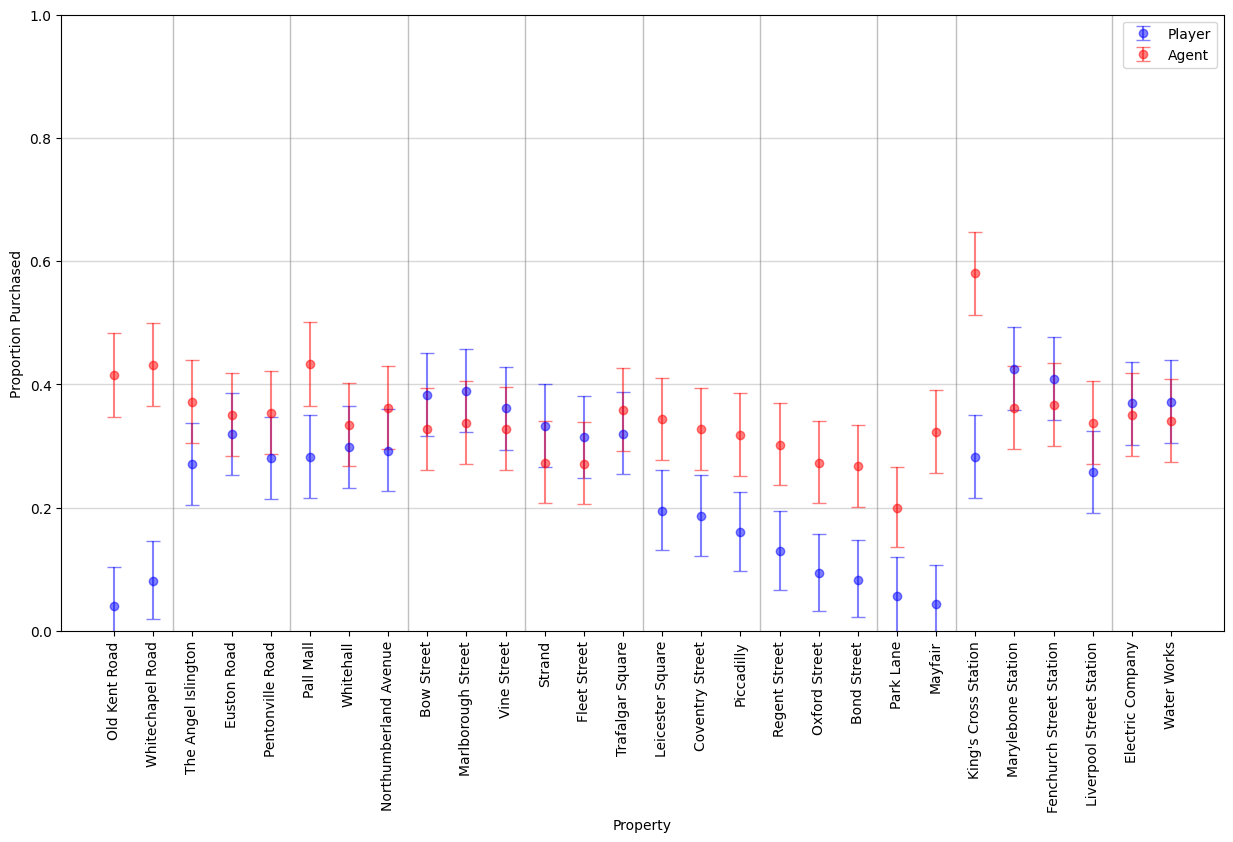

In [351]:
interval_whiskers_property_plot(props_bought_agent, props_bought_player)

In [352]:
num_props_bought_agent = [0] * n
num_props_bought_player = [0] * n

# Calculate the number of properties bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Properties']):
    for prop in game:
        if prop[0] == 'Agent':
            num_props_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_props_bought_player[idx] += 1
        else:
            pass

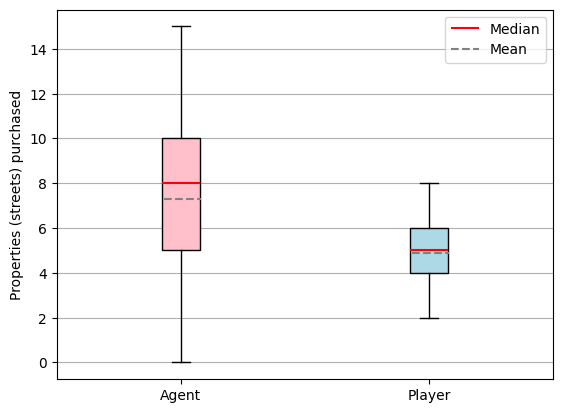

In [353]:
# Plot the boxplot for the number of properties bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_props_bought_agent, num_props_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=1.5, label='Median')
box['medians'][1].set(color='red', linewidth=1.5)

ax.set_xticks([1, 2])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_props_bought_agent), np.mean(num_props_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_props_bought_player), np.mean(num_props_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Properties (streets) purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [354]:
num_stations_bought_agent = [0] * n
num_stations_bought_player = [0] * n

# Calculate the number of stations bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Stations']):
    for prop in game:
        if prop[0] == 'Agent':
            num_stations_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_stations_bought_player[idx] += 1
        else:
            pass

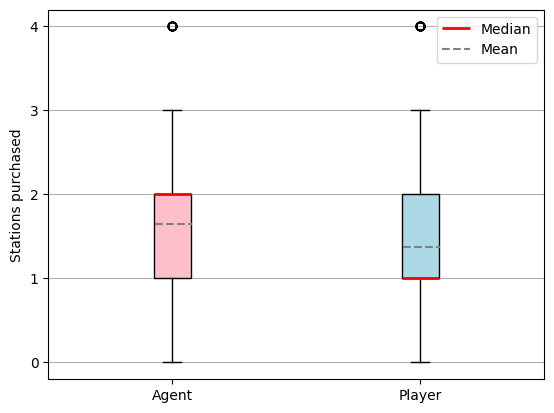

In [355]:
# Plot the boxplot for the number of stations bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_stations_bought_agent, num_stations_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_stations_bought_agent), np.mean(num_stations_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_stations_bought_player), np.mean(num_stations_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Stations purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [356]:
num_utilities_bought_agent = [0] * n
num_utilities_bought_player = [0] * n

# Calculate the number of utilities bought by the agent and player in each game
for idx, game in enumerate(game_outcomes['Utilities']):
    for prop in game:
        if prop[0] == 'Agent':
            num_utilities_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_utilities_bought_player[idx] += 1
        else:
            pass

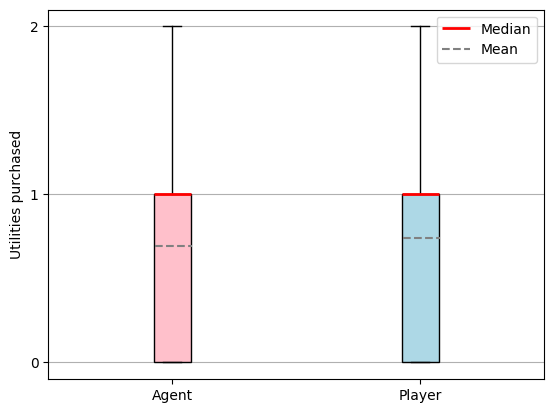

In [357]:
# Plot the boxplot for the number of utilities bought by the agent and player
fig, ax = plt.subplots()
box = ax.boxplot([num_utilities_bought_agent, num_utilities_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_utilities_bought_agent), np.mean(num_utilities_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_utilities_bought_player), np.mean(num_utilities_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Utilities purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [358]:
houses_bought_player_1 = [0]*22
houses_bought_agent_1 = [0]*22
houses_bought_player_2 = [0]*22
houses_bought_agent_2 = [0]*22
houses_bought_player_3 = [0]*22
houses_bought_agent_3 = [0]*22
houses_bought_player_4 = [0]*22
houses_bought_agent_4 = [0]*22
hotels_bought_player = [0]*22
hotels_bought_agent = [0]*22
built_player = [0]*22
built_agent = [0]*22
p = 1/n

# Calculate the proportion of times each house was bought by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            if prop[1] > 0 or prop[2]:
                built_player[idx] += p

            if prop[1] == 1:
                houses_bought_player_1[idx] += p
            elif prop[1] == 2:
                houses_bought_player_2[idx] += p
            elif prop[1] == 3:
                houses_bought_player_3[idx] += p
            elif prop[1] == 4:
                houses_bought_player_4[idx] += p
            elif prop[2]:
                hotels_bought_player[idx] += p
            else:
                pass
        elif prop[0] == 'Agent':
            if prop[1] > 0 or prop[2]:
                built_agent[idx] += p

            if prop[1] == 1:
                houses_bought_agent_1[idx] += p
            elif prop[1] == 2:
                houses_bought_agent_2[idx] += p
            elif prop[1] == 3:
                houses_bought_agent_3[idx] += p
            elif prop[1] == 4:
                houses_bought_agent_4[idx] += p
            elif prop[2]:
                hotels_bought_agent[idx] += p
            else:
                pass
        else:
            pass

In [359]:
# Normalise outcomes
houses_bought_player_1_normalised = [houses_bought_player_1[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_1_normalised = [houses_bought_agent_1[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_2_normalised = [houses_bought_player_2[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_2_normalised = [houses_bought_agent_2[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_3_normalised = [houses_bought_player_3[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_3_normalised = [houses_bought_agent_3[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_4_normalised = [houses_bought_player_4[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_4_normalised = [houses_bought_agent_4[i]/props_bought_agent[i] for i in range(22)]
hotels_bought_player_normalised = [hotels_bought_player[i]/props_bought_player[i] for i in range(22)]
hotels_bought_agent_normalised = [hotels_bought_agent[i]/props_bought_agent[i] for i in range(22)]
built_player_normalised = [built_player[i]/props_bought_agent[i] for i in range(22)]
built_agent_normalised = [built_agent[i]/props_bought_agent[i] for i in range(22)]

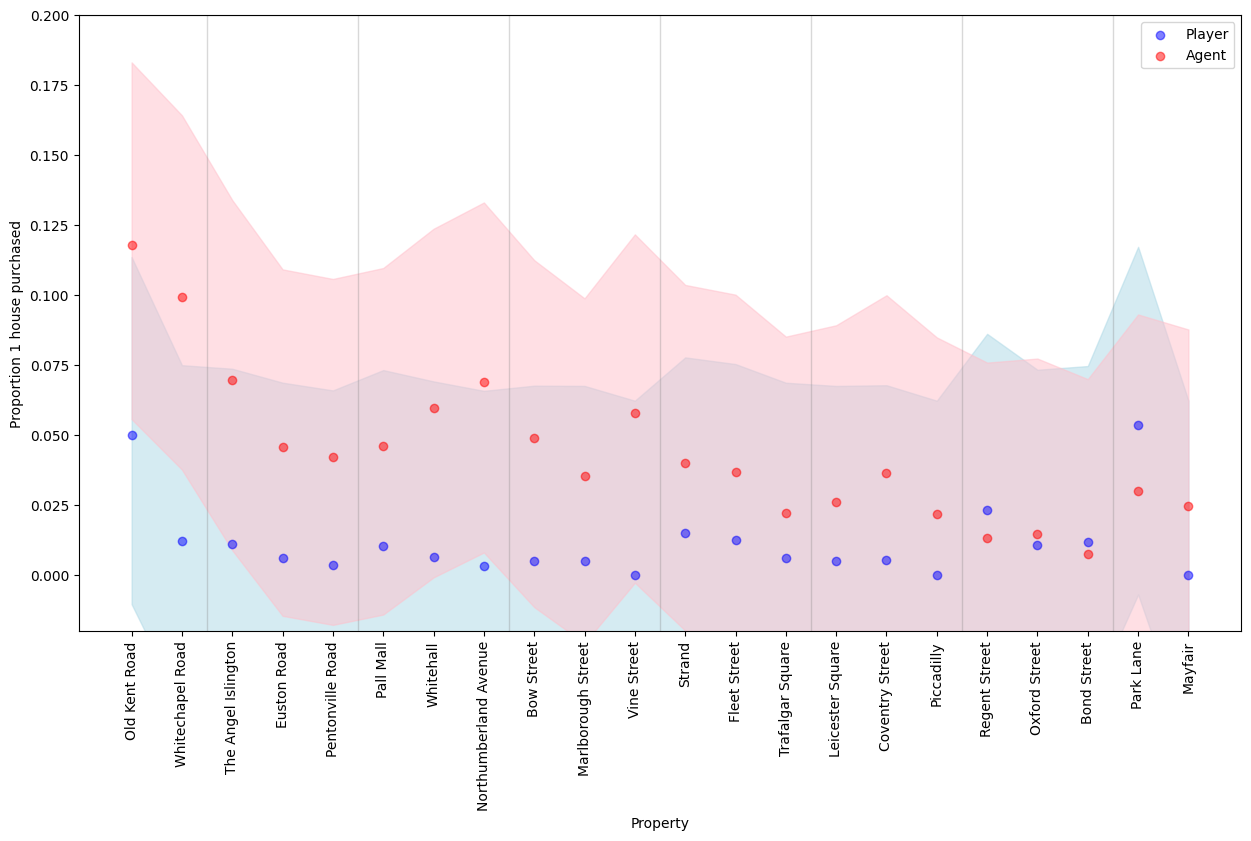

In [360]:
interval_property_plot(houses_bought_agent_1_normalised, houses_bought_player_1_normalised, 'Proportion 1 house purchased', ylim0=-0.02, ylim1=0.2)

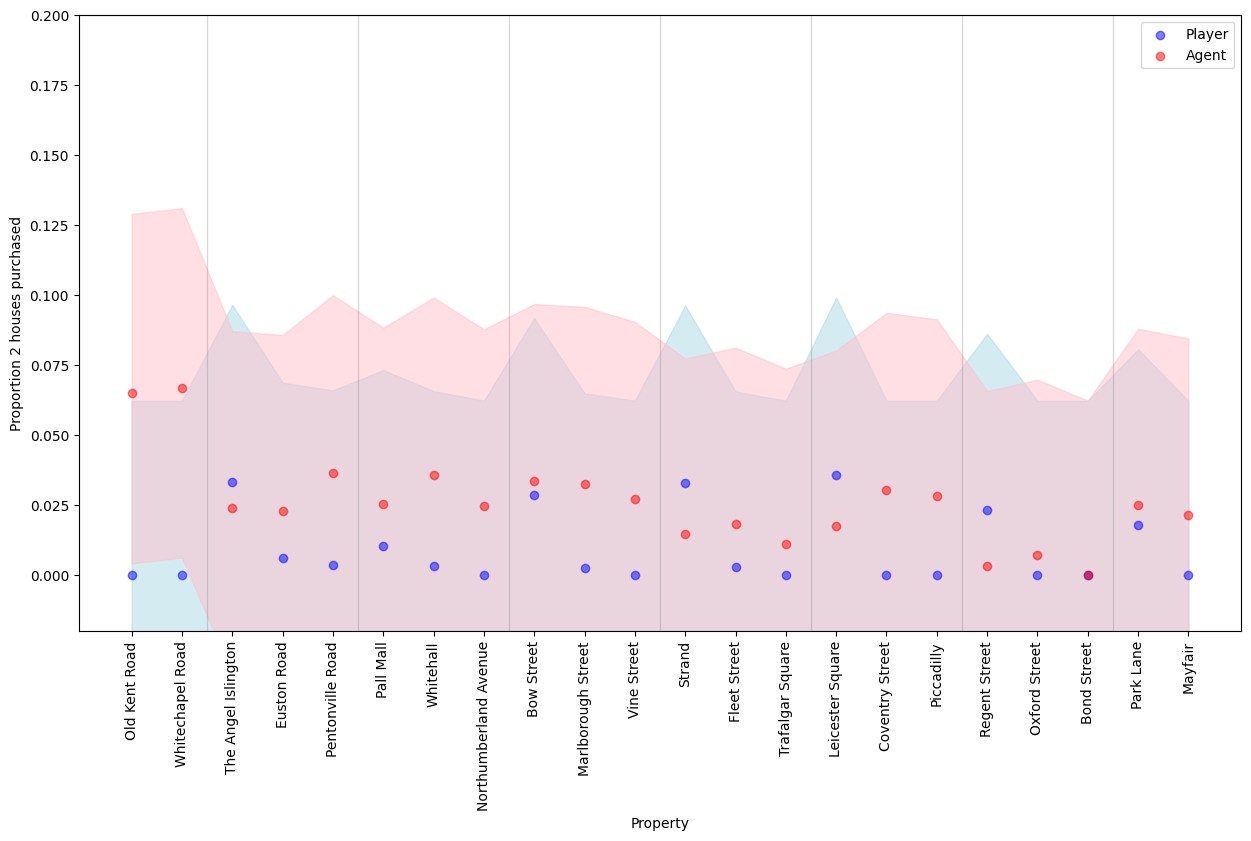

In [361]:
interval_property_plot(houses_bought_agent_2_normalised, houses_bought_player_2_normalised, 'Proportion 2 houses purchased', ylim0=-0.02, ylim1=0.2)

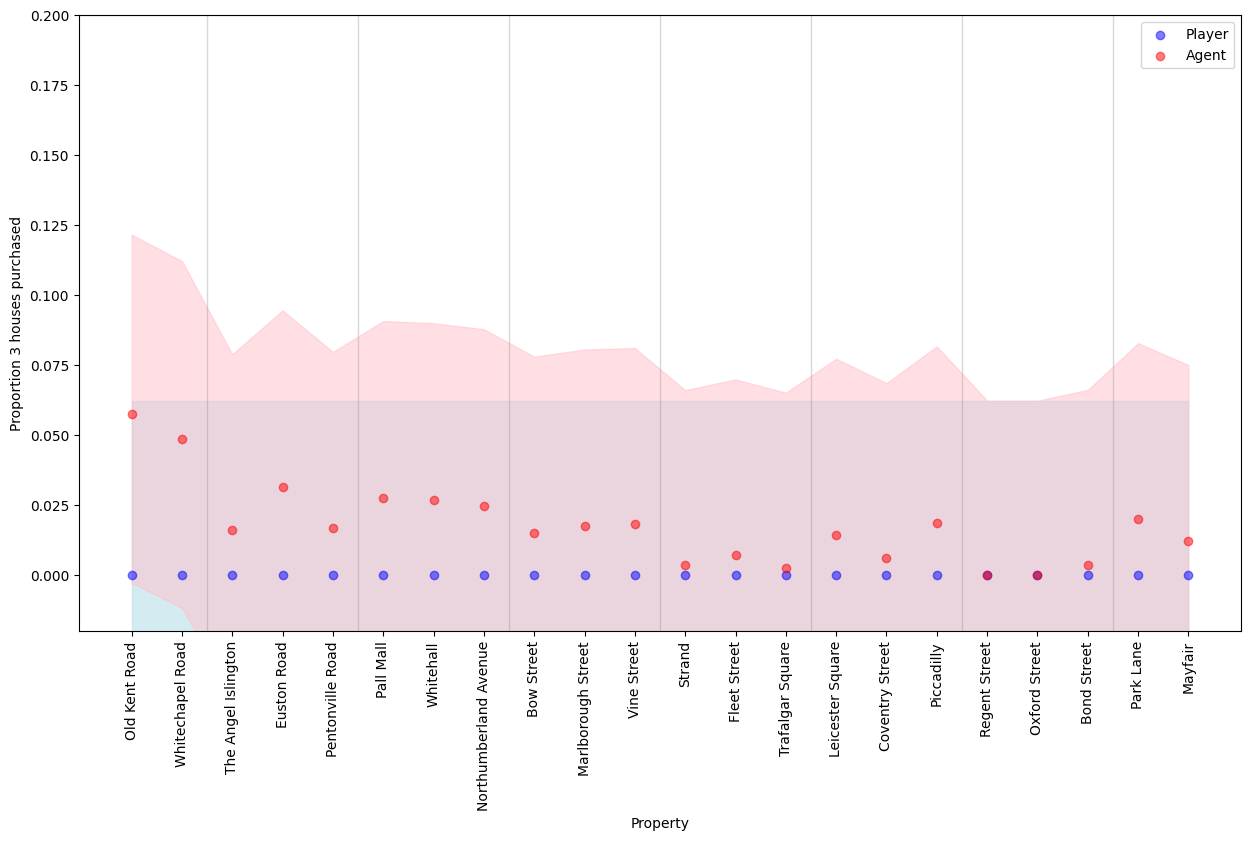

In [362]:
interval_property_plot(houses_bought_agent_3_normalised, houses_bought_player_3_normalised, 'Proportion 3 houses purchased', ylim0=-0.02, ylim1=0.2)

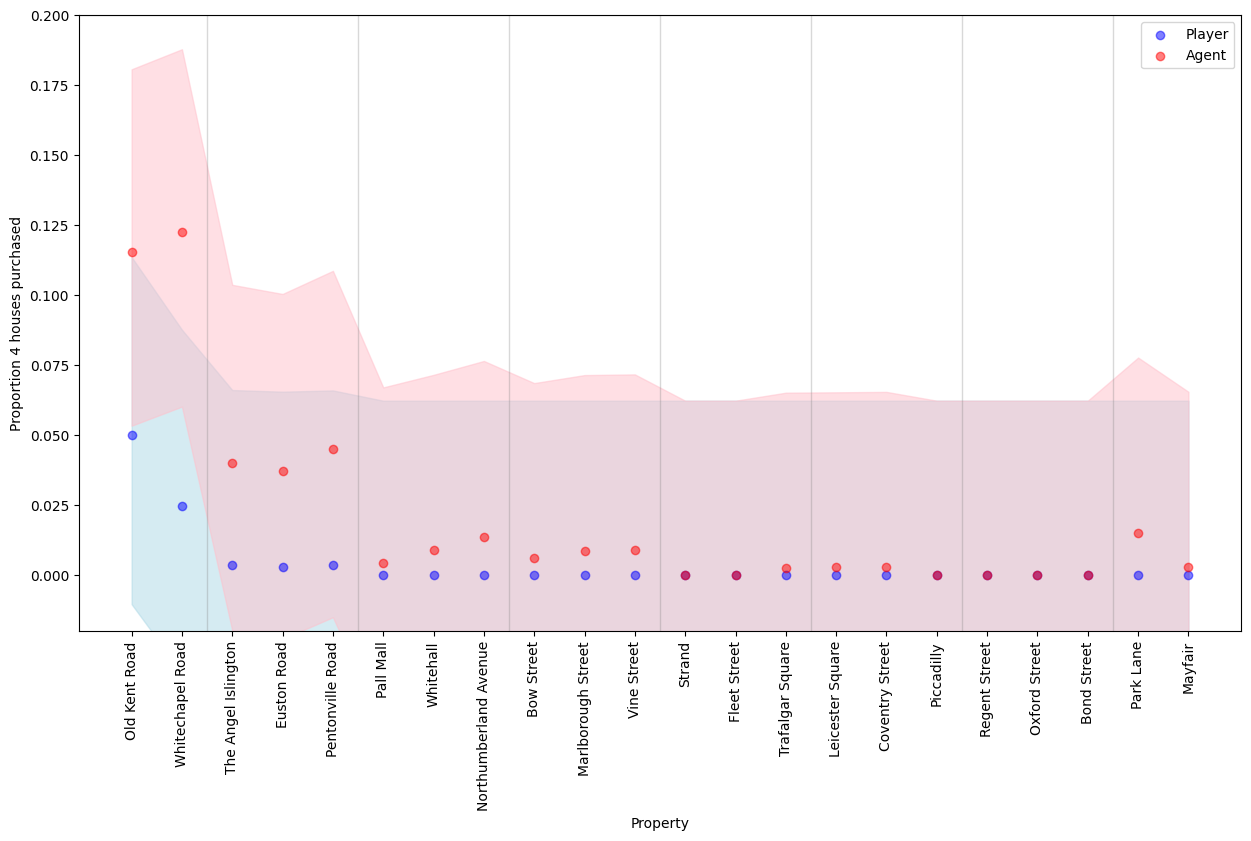

In [363]:
interval_property_plot(houses_bought_agent_4_normalised, houses_bought_player_4_normalised, 'Proportion 4 houses purchased', ylim0=-0.02, ylim1=0.2)

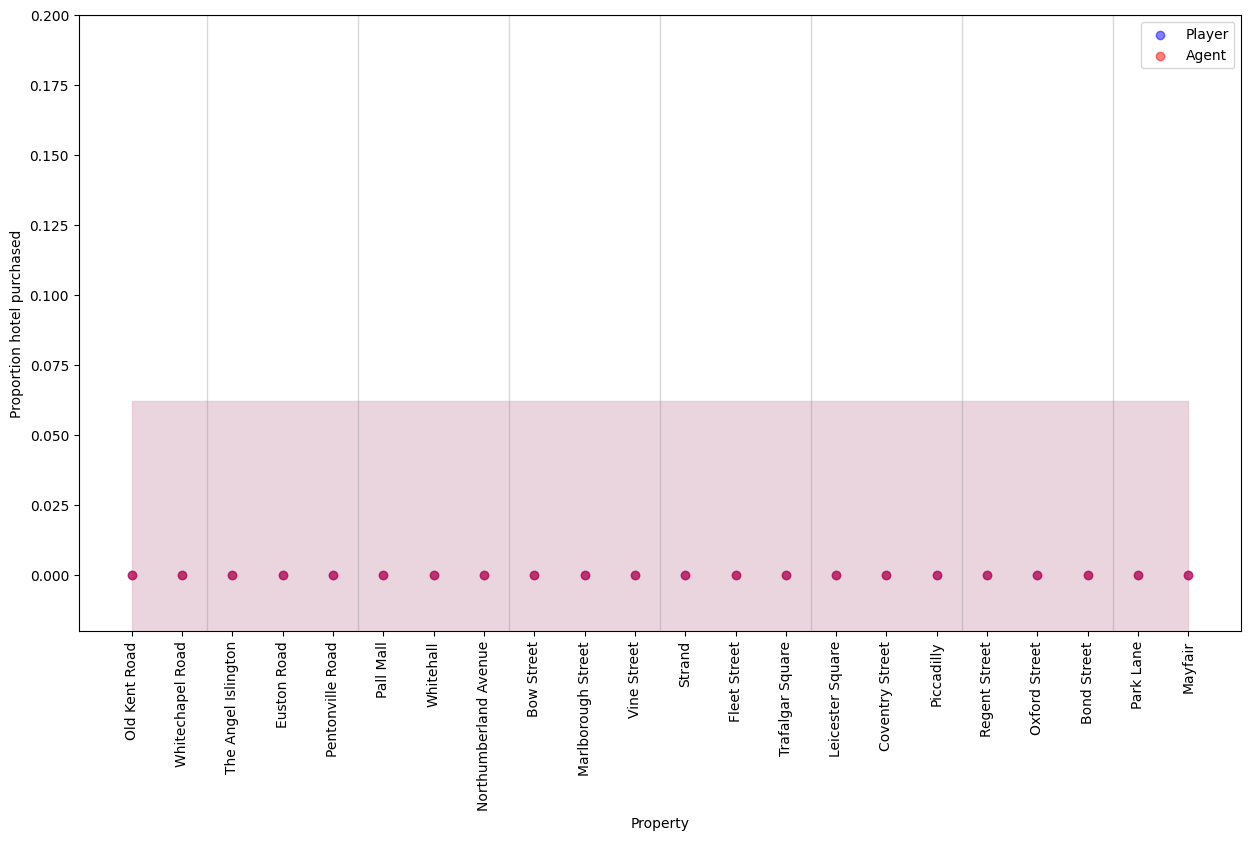

In [364]:
interval_property_plot(hotels_bought_agent_normalised, hotels_bought_player_normalised, 'Proportion hotel purchased', ylim0=-0.02, ylim1=0.2)

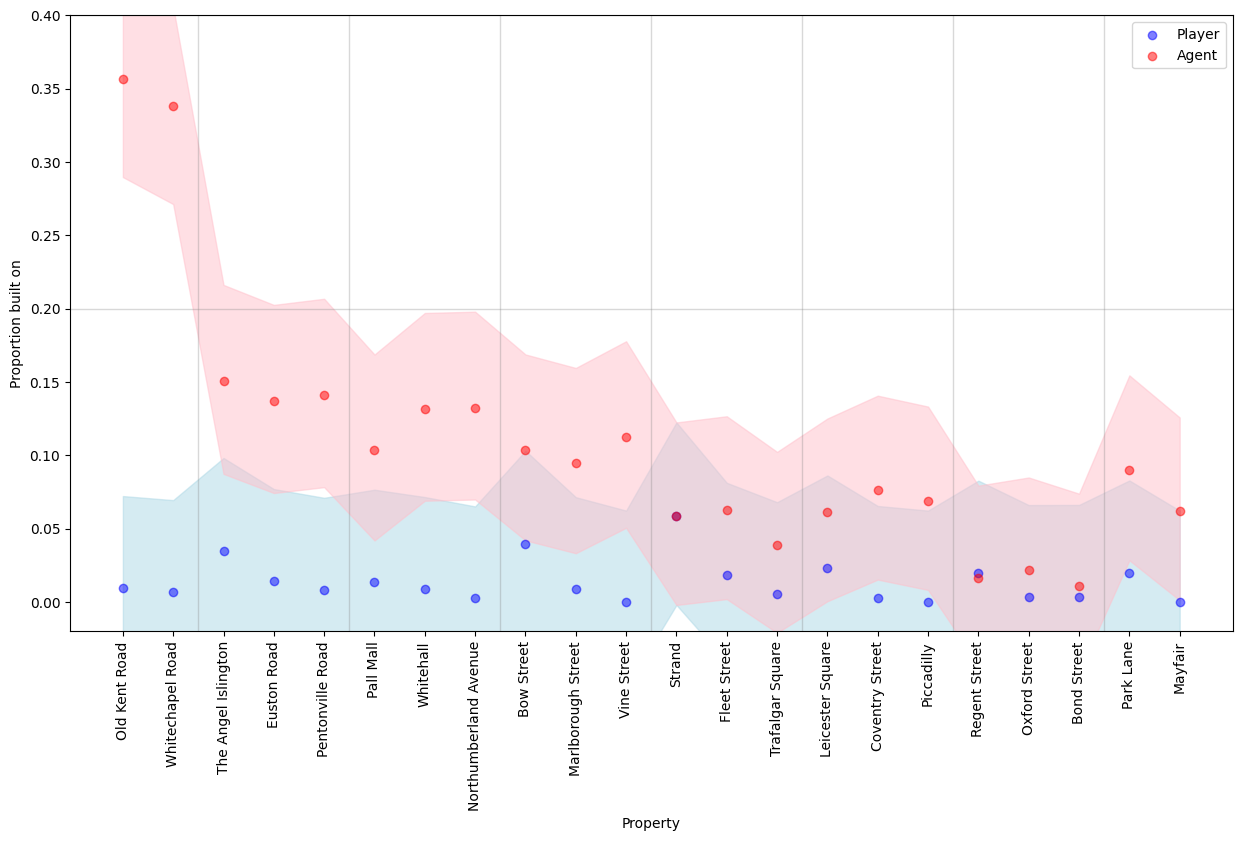

In [365]:
interval_property_plot(built_agent_normalised, built_player_normalised, 'Proportion built on', ylim0=-0.02, ylim1=0.4)

In [366]:
mortgaged_player = [0]*28
mortgaged_agent = [0]*28
p = 1/n

# Calculate the proportion of times each property was mortgaged by the agent and player
for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[3]:
            mortgaged_player[idx] += p
        elif prop[0] == 'Agent' and prop[3]:
            mortgaged_agent[idx] += p
        else:
            pass

# Calculate the proportion of times each station was mortgaged by the agent and player
for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+22] += p
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+22] += p
        else:
            pass

# Calculate the proportion of times each utility was mortgaged by the agent and player
for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+26] += p
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+26] += p
        else:
            pass

In [367]:
# Normalise outcomes
mortgaged_player_normalised = [mortgaged_player[i]/props_bought_agent[i] for i in range(28)]
mortgaged_agent_normalised = [mortgaged_agent[i]/props_bought_agent[i] for i in range(28)]

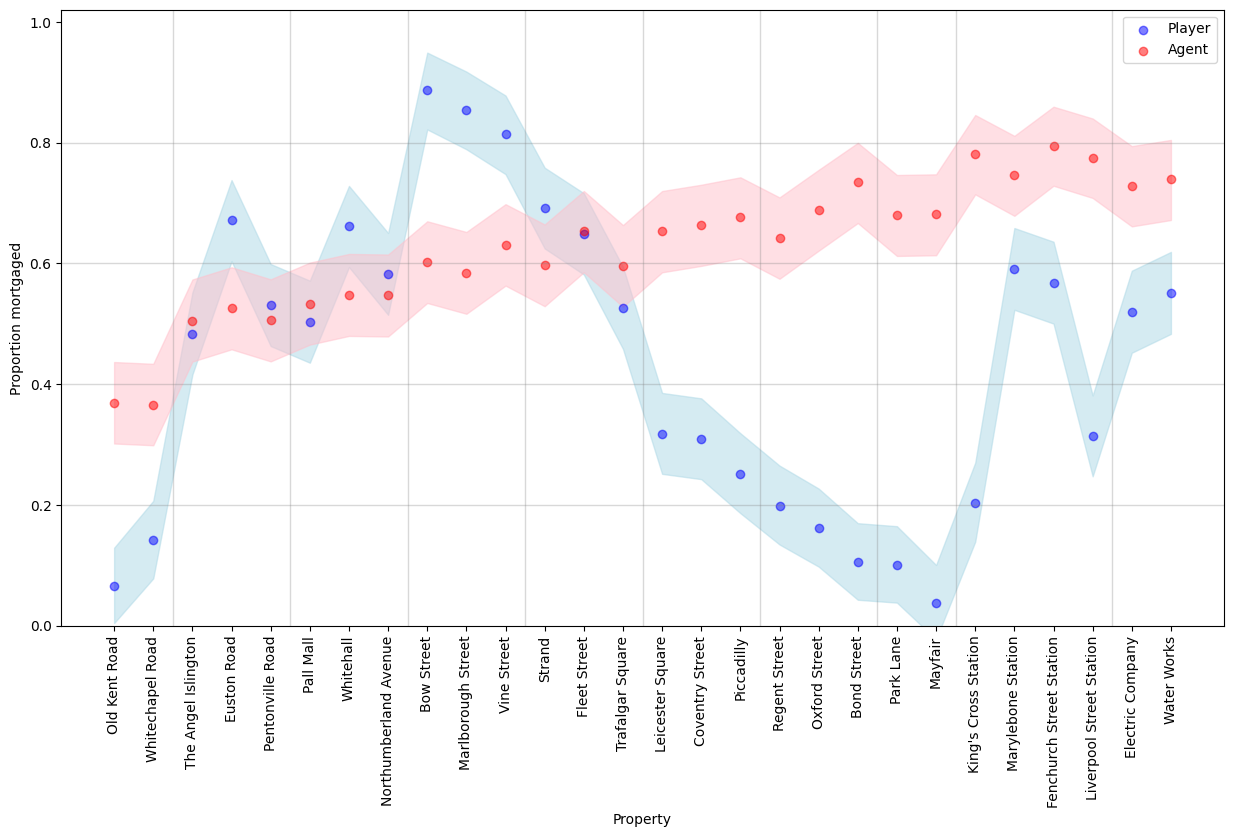

In [368]:
interval_property_plot(mortgaged_agent_normalised, mortgaged_player_normalised, 'Proportion mortgaged', ylim0=0, ylim1=1.02)

## Analysing Node Actions

### File paths

In [2]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_1.json'
with open(file_path, 'r') as json_file:
    node_actions_1 = json.load(json_file)

In [3]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_2.json'
with open(file_path, 'r') as json_file:
    node_actions_2 = json.load(json_file)

In [4]:
file_path = 'MCTS_BaseStrategy_MaxRounds100_1000_node_actions_3.json'
with open(file_path, 'r') as json_file:
    node_actions_3 = json.load(json_file)

In [5]:
node_actions_long_games = node_actions_1 + node_actions_2 + node_actions_3

In [6]:
file_path = 'MCTS_BaseStrategy_MaxRounds20_5000_node_actions_1.json'
with open(file_path, 'r') as json_file:
    node_actions_1 = json.load(json_file)

In [7]:
file_path = 'MCTS_BaseStrategy_MaxRounds20_5000_node_actions_2.json'
with open(file_path, 'r') as json_file:
    node_actions_2 = json.load(json_file)

In [8]:
node_actions = node_actions_1 + node_actions_2

In [12]:
rounds = []
for n in node_actions:
    rounds.append(n[-1][2])

np.mean(rounds), np.median(rounds), min(rounds), max(rounds)

(19.9664, 20.0, 8, 20)

In [13]:
rounds = []
for n in node_actions_long_games:
    rounds.append(n[-1][2])

np.mean(rounds), np.median(rounds), min(rounds), max(rounds)

(68.677, 67.0, 13, 100)

### Purchasing Properties

#### Should you purchase property x?

In [9]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "The Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch St. Station",
    "Liverpool St. Station",
    "Electric Company",
    "Water Works"
]

In [10]:
property_colors = [
    'brown', 'brown', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink', 'orange', 'orange', 'orange',
    'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'green', 'green', 'green', 'blue', 'blue', 'black', 'black',
    'black', 'black', 'grey', 'grey'
]

In [15]:
sum_wealth_agent = 0
sum_wealth_player = 0
num = 0

# Calculate the average wealth for the agent and player
for i in range(5000):
    for j in range(len(node_actions[i])):
        sum_wealth_agent += node_actions[i][j][3]
        sum_wealth_player += node_actions[i][j][4][0]
        num += 1
avg_agent_wealth = sum_wealth_agent/num
avg_player_wealth = sum_wealth_player/num

In [16]:
avg_agent_wealth, avg_player_wealth

(1993.2207815817324, 1463.0171080566936)

In [17]:
sum_wealth_agent = 0
sum_wealth_player = 0
num = 0

# Calculate the average wealth for the agent and player
for i in range(1000):
    for j in range(len(node_actions_long_games[i])):
        sum_wealth_agent += node_actions_long_games[i][j][3]
        sum_wealth_player += node_actions_long_games[i][j][4][0]
        num += 1
avg_agent_wealth_long_games = sum_wealth_agent/num
avg_player_wealth_long_games = sum_wealth_player/num

In [18]:
avg_agent_wealth_long_games, avg_player_wealth_long_games

(2411.976686072056, 1575.3425577584944)

In [11]:
n = len(property_names)
df_purchase = pd.DataFrame({'Property': property_names, 'In legal actions (early game, low wealth)': [0]*n, 'In legal actions (early game, high wealth)': [0]*n,
                            'In legal actions (late game, low wealth)': [0]*n, 'In legal actions (late game, high wealth)': [0]*n,
                            'Action taken (early game, low wealth)': [0]*n, 'Action taken (early game, high wealth)': [0]*n,
                            'Action taken (late game, low wealth)': [0]*n, 'Action taken (late game, high wealth)': [0]*n})

In [12]:
def populator(df, action_prefix, col, action, purchase_actions):
    """
    This function populates a dataframe with information about property actions and purchases.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to be populated.
    action_prefix : str
        The prefix of the action to be checked.
    col : str
        The column in the dataframe to be updated.
    action : str
        The action to be checked.
    purchase_actions : list of str
        The list of purchase actions to be checked.
    
    Returns
    -------
    None
    """
    # Populate the dataframe with information about property actions
    if action.startswith(action_prefix):
        property_name = action[len(action_prefix):].strip()
        df.loc[df["Property"] == property_name, "Action taken "+col] += 1

    # Populate the dataframe with information about property purchases
    if purchase_actions:
        for purchase_action in purchase_actions:
            property_name = purchase_action[len(action_prefix):].strip()
            df.loc[df["Property"] == property_name, "In legal actions "+col] += 1

In [13]:
def populate_df(df, node_actions, action_prefix, round_boundary=10, wealth_boundary=1800):
    """
    Populates a dataframe with data based on node actions.

    Parameters
    ----------
    df : DataFrame
        The dataframe to populate.
    node_actions : list
        List of node actions.
    action_prefix : str
        Prefix for action.
    round_boundary : int, optional
        Round boundary, by default 10.
    wealth_boundary : int, optional
        Wealth boundary, by default 1800.

    Returns
    -------
    None
    """
    for node_actions_game in tqdm(node_actions):
        for action, legal_actions, round, agent_wealth, player_wealth in node_actions_game:
            purchase_actions = [legal_action for legal_action in legal_actions if legal_action.startswith(action_prefix)]

            # Populate the dataframe with information about property actions and purchases
            if round < round_boundary and agent_wealth < wealth_boundary:
                populator(df, action_prefix, '(early game, low wealth)', action, purchase_actions)
            elif round < round_boundary and agent_wealth >= wealth_boundary:
                populator(df, action_prefix, '(early game, high wealth)', action, purchase_actions)
            elif round >= round_boundary and agent_wealth < wealth_boundary:
                populator(df, action_prefix, '(late game, low wealth)', action, purchase_actions)
            else:
                populator(df, action_prefix, '(late game, high wealth)', action, purchase_actions)

In [14]:
def populate_df_rounds(df, node_actions, action_prefix, round_boundary=10):
    """
    Populates a dataframe with data based on node actions and rounds.

    Parameters
    ----------
    df : DataFrame
        The dataframe to populate.
    node_actions : list
        List of node actions.
    action_prefix : str
        Prefix for action.
    round_boundary : int, optional
        Round boundary, by default 10.

    Returns
    -------
    None
    """
    for node_actions_game in tqdm(node_actions):
        for action, legal_actions, round, agent_wealth, player_wealth in node_actions_game:
            purchase_actions = [legal_action for legal_action in legal_actions if legal_action.startswith(action_prefix)]

            # Populate the dataframe with information about property actions and purchases
            if round < round_boundary:
                populator(df, action_prefix, '(early game)', action, purchase_actions)
            else:
                populator(df, action_prefix, '(late game)', action, purchase_actions)

In [15]:
def populate_df_wealth_agent(df, node_actions, action_prefix, wealth_boundary=1800):
    """
    Populates a dataframe with wealth information for each agent based on their actions.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to populate with wealth information.
    node_actions : list
        A list of node actions for each game.
    action_prefix : str
        The prefix used to identify specific actions.
    wealth_boundary : int, optional
        The wealth boundary used to categorize agents as having low or high wealth, by default 1800.

    Returns
    -------
    None
    """
    for node_actions_game in tqdm(node_actions):
        for action, legal_actions, round, agent_wealth, player_wealth in node_actions_game:
            purchase_actions = [legal_action for legal_action in legal_actions if legal_action.startswith(action_prefix)]

            # Populate the dataframe with wealth information for each agent
            if agent_wealth < wealth_boundary:
                populator(df, action_prefix, '(low wealth)', action, purchase_actions)
            else:
                populator(df, action_prefix, '(high wealth)', action, purchase_actions)

In [16]:
def populate_df_wealth_player(df, node_actions, action_prefix, wealth_boundary=1300):
    """
    Populates a dataframe with wealth-related information for each player action.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to populate.
    node_actions : list
        List of node actions.
    action_prefix : str
        Prefix for the action.
    wealth_boundary : int, optional
        Wealth boundary for categorizing players, by default 1300.

    Returns
    -------
    None
    """
    for node_actions_game in tqdm(node_actions):
        for action, legal_actions, round, agent_wealth, player_wealth in node_actions_game:
            purchase_actions = [legal_action for legal_action in legal_actions if legal_action.startswith(action_prefix)]

            # Populate the dataframe with wealth-related information for each player action
            if player_wealth < wealth_boundary:
                populator(df, action_prefix, '(other player low wealth)', action, purchase_actions)
            else:
                populator(df, action_prefix, '(other player high wealth)', action, purchase_actions)

In [17]:
def wilson_score_error(p, n, z=norm.ppf(0.975)):
    """
    Calculate the Wilson score error for a given proportion.

    Parameters
    ----------
    p : float
        The proportion (success rate).
    n : int
        The sample size.
    z : float, optional
        The z-score for the desired confidence level (default is 1.96 for 95% confidence).

    Returns
    -------
    float
        The Wilson score error.
    """
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    error = p - ((phat - margin_of_error) / (1 + z_squared / n))
    return error

In [ ]:
populate_df(df_purchase, node_actions, "Purchase")

In [18]:
def populate_prop_err(df, df_type, col):
    """
    Populates a dataframe with property error information based on the given dataframe type and column.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to populate.
    df_type : str
        The type of the dataframe.
    col : str
        The column in the dataframe.

    Returns
    -------
    None
    """
    df[df_type+' '+col] = df['Action taken '+col]/df['In legal actions '+col]
    df['Error '+col] = wilson_score_error(df[df_type+' '+col], df['In legal actions '+col])

In [28]:
populate_prop_err(df_purchase, 'Proportion purchased', '(early game, low wealth)')
populate_prop_err(df_purchase, 'Proportion purchased', '(early game, high wealth)')
populate_prop_err(df_purchase, 'Proportion purchased', '(late game, low wealth)')
populate_prop_err(df_purchase, 'Proportion purchased', '(late game, high wealth)')
df_purchase.head()

,Property,"In legal actions (early game, low wealth)","In legal actions (early game, high wealth)","In legal actions (late game, low wealth)","In legal actions (late game, high wealth)","Action taken (early game, low wealth)","Action taken (early game, high wealth)","Action taken (late game, low wealth)","Action taken (late game, high wealth)","Proportion purchased (early game, low wealth)","Error (early game, low wealth)","Proportion purchased (early game, high wealth)","Error (early game, high wealth)","Proportion purchased (late game, low wealth)","Error (late game, low wealth)","Proportion purchased (late game, high wealth)","Error (late game, high wealth)"
0,Old Kent Road,591,345,197,2389,147,94,35,444,0.248731,0.084173,0.272464,0.109824,0.177665,0.137912,0.185852,0.041707
1,Whitechapel Road,884,380,168,2284,288,94,32,388,0.325792,0.070545,0.247368,0.104053,0.190476,0.149153,0.169877,0.042413
2,The Angel Islington,1044,392,135,1843,424,101,25,336,0.406130,0.065904,0.257653,0.102851,0.185185,0.164193,0.182311,0.047327
3,Euston Road,1132,464,200,1743,494,106,34,331,0.436396,0.063550,0.228448,0.093980,0.170000,0.136492,0.189902,0.048763
4,Pentonville Road,1122,380,152,1978,432,99,30,337,0.385027,0.063411,0.260526,0.104486,0.197368,0.156546,0.170374,0.045528


In [45]:
def plot_action_proportions(df, y1, y2, y3, y4, y1_err, y2_err, y3_err, y4_err, ylabel, max_idx=28, ymin=-0.04, ymax=0.5):
    """
    Plots the action proportions for different wealth categories and rounds.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the data.
    y1 : str
        The column name for the y-axis of the first wealth category in round < 10.
    y2 : str
        The column name for the y-axis of the second wealth category in round < 10.
    y3 : str
        The column name for the y-axis of the first wealth category in round ≥ 10.
    y4 : str
        The column name for the y-axis of the second wealth category in round ≥ 10.
    y1_err : str
        The column name for the error bars of the first wealth category in round < 10.
    y2_err : str
        The column name for the error bars of the second wealth category in round < 10.
    y3_err : str
        The column name for the error bars of the first wealth category in round ≥ 10.
    y4_err : str
        The column name for the error bars of the second wealth category in round ≥ 10.
    ylabel : str
        The label for the y-axis.
    max_idx : int, optional
        The maximum index to plot, by default 28.
    ymin : float, optional
        The minimum value for the y-axis, by default -0.04.
    ymax : float, optional
        The maximum value for the y-axis, by default 0.5.

    Returns
    -------
    None
    """
    fig = make_subplots(rows=2, 
                        cols=1, 
                        shared_xaxes=True, 
                        vertical_spacing=0.1,
                        y_title=ylabel,
                        subplot_titles=('Round < 10', 'Round ≥ 10'))

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Property'],
            y=df.loc[:max_idx][y1],
            error_y=dict(type='data', array=df.loc[:max_idx][y1_err]),
            mode='markers',
            name='Wealth < 1800',
            opacity=0.6,
            marker=dict(color='red'),
            
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Property'],
            y=df.loc[:max_idx][y2],
            error_y=dict(type='data', array=df.loc[:max_idx][y2_err]),
            mode='markers',
            name='Wealth ≥ 1800',
            opacity=0.6,
            marker=dict(color='blue') 
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Property'],
            y=df.loc[:max_idx][y3],
            error_y=dict(type='data', array=df.loc[:max_idx][y3_err]),
            mode='markers',
            opacity=0.6,
            marker=dict(color='red'),
            showlegend=False
        ),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Property'],
            y=df.loc[:max_idx][y4],
            error_y=dict(type='data', array=df.loc[:max_idx][y4_err]),
            mode='markers',
            opacity=0.6,
            marker=dict(color='blue'),
            showlegend=False
        ),
        row=2, col=1
    )

    fig.update_layout(
        height=800,
        yaxis=dict(range=[ymin, ymax]),
        yaxis2=dict(range=[ymin, ymax])
    )

    fig.update_xaxes(title_text='Property',
                     tickangle=270)

    fig.show()

In [46]:
def plot_action_proportions_onevar(df, y1, y2, y1_err, y2_err, y1_name, y2_name, ylabel, max_idx=28, ymin=-0.04, ymax=0.5):
    """
    Plots the action proportions for a single variable.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the data.
    y1 : str
        The column name for the y-axis of the first variable.
    y2 : str
        The column name for the y-axis of the second variable.
    y1_err : str
        The column name for the error bars of the first variable.
    y2_err : str
        The column name for the error bars of the second variable.
    y1_name : str
        The name of the first variable.
    y2_name : str
        The name of the second variable.
    ylabel : str
        The label for the y-axis.
    max_idx : int, optional
        The maximum index to plot, by default 28.
    ymin : float, optional
        The minimum value for the y-axis, by default -0.04.
    ymax : float, optional
        The maximum value for the y-axis, by default 0.5.

    Returns
    -------
    None
    """
    fig = px.scatter(
        df.loc[:max_idx],
        x='Property',
        y=y1,
        error_y=y1_err,
        opacity=0.5
    )

    fig2 = px.scatter(
        df.loc[:max_idx],
        x='Property',
        y=y2,
        error_y=y2_err,
        color_discrete_sequence=['red']
    )

    fig.update_traces(
        name=y1_name,  
        showlegend=True
    )

    fig2.update_traces(
        name=y2_name,  
        showlegend=True,
        opacity=0.5
    )

    fig.update_layout(
        yaxis_title=ylabel,
        yaxis=dict(range=[ymin, ymax]),
        xaxis_tickangle=270,
        height=800
    )

    fig.add_trace(fig2.data[0])
    fig.show()

In [41]:
plot_action_proportions(df_purchase, 'Proportion purchased (early game, low wealth)', 'Proportion purchased (early game, high wealth)', 
                        'Proportion purchased (late game, low wealth)', 'Proportion purchased (late game, high wealth)', 
                        'Error (early game, low wealth)', 'Error (early game, high wealth)', 'Error (late game, low wealth)', 
                        'Error (late game, high wealth)', 'Proportion purchased', ymax=0.6)

### Building on Properties

#### Should I purchase a house on property x?

In [57]:
n = len(property_names)
df_build_house = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n, 
                   'In legal actions (low wealth)': [0]*n, 'In legal actions (high wealth)': [0]*n,
                   'Action taken (low wealth)': [0]*n, 'Action taken (high wealth)': [0]*n})

In [58]:
populate_df_rounds(df_build_house, node_actions_long_games, "Buy house on", round_boundary=50)

100%|██████████| 1000/1000 [01:34<00:00, 10.55it/s]


In [59]:
populate_prop_err(df_build_house, 'Proportion built house on', '(early game)')
populate_prop_err(df_build_house, 'Proportion built house on', '(late game)')
df_build_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built house on (early game),Error (early game),Proportion built house on (late game),Error (late game)
0,Old Kent Road,9622,25849,929,2232,0,0,0,0,0.096550,0.020282,0.086348,0.012364
1,Whitechapel Road,9489,26360,933,2205,0,0,0,0,0.098324,0.020437,0.083649,0.012231
2,The Angel Islington,2838,7880,241,575,0,0,0,0,0.084919,0.036873,0.072970,0.022167
3,Euston Road,2681,7772,249,587,0,0,0,0,0.092876,0.038050,0.075528,0.022344
4,Pentonville Road,2749,7827,241,590,0,0,0,0,0.087668,0.037500,0.075380,0.022265


In [60]:
plot_action_proportions_onevar(df_build_house, 'Proportion built house on (early game)', 'Proportion built house on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion built house on', 
                        max_idx=21, ymin=-0.02, ymax=0.3)

In [61]:
populate_df_wealth_agent(df_build_house, node_actions_long_games, "Buy house on", wealth_boundary=2300)

100%|██████████| 1000/1000 [01:42<00:00,  9.74it/s]


In [62]:
populate_prop_err(df_build_house, 'Proportion built house on', '(low wealth)')
populate_prop_err(df_build_house, 'Proportion built house on', '(high wealth)')
df_build_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built house on (early game),Error (early game),Proportion built house on (late game),Error (late game),Proportion built house on (low wealth),Error (low wealth),Proportion built house on (high wealth),Error (high wealth)
0,Old Kent Road,9622,25849,929,2232,20350,15121,1873,1288,0.096550,0.020282,0.086348,0.012364,0.092039,0.013958,0.085180,0.016132
1,Whitechapel Road,9489,26360,933,2205,20420,15429,1849,1289,0.098324,0.020437,0.083649,0.012231,0.090548,0.013926,0.083544,0.015960
2,The Angel Islington,2838,7880,241,575,5809,4909,461,355,0.084919,0.036873,0.072970,0.022167,0.079360,0.025847,0.072316,0.027999
3,Euston Road,2681,7772,249,587,5494,4959,459,377,0.092876,0.038050,0.075528,0.022344,0.083546,0.026617,0.076023,0.027905
4,Pentonville Road,2749,7827,241,590,5752,4824,458,373,0.087668,0.037500,0.075380,0.022265,0.079624,0.025976,0.077322,0.028304


In [63]:
plot_action_proportions_onevar(df_build_house, 'Proportion built house on (low wealth)', 'Proportion built house on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion built house on', 
                        max_idx=21, ymin=-0.02, ymax=0.2)

#### A hotel?

In [64]:
n = len(property_names)
df_build_hotel = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n, 
                   'In legal actions (low wealth)': [0]*n, 'In legal actions (high wealth)': [0]*n,
                   'Action taken (low wealth)': [0]*n, 'Action taken (high wealth)': [0]*n})

In [65]:
populate_df_rounds(df_build_hotel, node_actions_long_games, "Buy hotel on", round_boundary=50)

  2%|▏         | 20/1000 [00:00<00:09, 102.64it/s]

100%|██████████| 1000/1000 [00:04<00:00, 212.35it/s]


In [66]:
populate_prop_err(df_build_hotel, 'Proportion built hotel on', '(early game)')
populate_prop_err(df_build_hotel, 'Proportion built hotel on', '(late game)')
df_build_hotel.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built hotel on (early game),Error (early game),Proportion built hotel on (late game),Error (late game)
0,Old Kent Road,1005,2827,105,206,0,0,0,0,0.104478,0.061723,0.072869,0.036743
1,Whitechapel Road,863,2432,95,217,0,0,0,0,0.110081,0.066604,0.089227,0.039851
2,The Angel Islington,78,179,13,14,0,0,0,0,0.166667,0.206108,0.078212,0.136864
3,Euston Road,137,202,8,14,0,0,0,0,0.058394,0.152084,0.069307,0.128964
4,Pentonville Road,100,185,10,11,0,0,0,0,0.100000,0.178643,0.059459,0.133352


In [67]:
plot_action_proportions_onevar(df_build_hotel, 'Proportion built hotel on (early game)', 'Proportion built hotel on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion built hotel on', 
                        max_idx=21, ymin=-0.02, ymax=1)

In [68]:
populate_df_wealth_agent(df_build_hotel, node_actions_long_games, "Buy hotel on", wealth_boundary=2300)

100%|██████████| 1000/1000 [00:04<00:00, 208.41it/s]


In [69]:
populate_prop_err(df_build_hotel, 'Proportion built hotel on', '(low wealth)')
populate_prop_err(df_build_hotel, 'Proportion built hotel on', '(high wealth)')
df_build_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built house on (early game),Error (early game),Proportion built house on (late game),Error (late game),Proportion built house on (low wealth),Error (low wealth),Proportion built house on (high wealth),Error (high wealth)
0,Old Kent Road,9622,25849,929,2232,20350,15121,1873,1288,0.096550,0.020282,0.086348,0.012364,0.092039,0.013958,0.085180,0.016132
1,Whitechapel Road,9489,26360,933,2205,20420,15429,1849,1289,0.098324,0.020437,0.083649,0.012231,0.090548,0.013926,0.083544,0.015960
2,The Angel Islington,2838,7880,241,575,5809,4909,461,355,0.084919,0.036873,0.072970,0.022167,0.079360,0.025847,0.072316,0.027999
3,Euston Road,2681,7772,249,587,5494,4959,459,377,0.092876,0.038050,0.075528,0.022344,0.083546,0.026617,0.076023,0.027905
4,Pentonville Road,2749,7827,241,590,5752,4824,458,373,0.087668,0.037500,0.075380,0.022265,0.079624,0.025976,0.077322,0.028304


In [70]:
plot_action_proportions_onevar(df_build_hotel, 'Proportion built hotel on (low wealth)', 'Proportion built hotel on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion built hotel on', 
                        max_idx=21, ymin=-0.02, ymax=1)

#### Should I build on property x?

In [71]:
df_build = pd.DataFrame({'Property': property_names, 
                         'In legal actions (early game)': df_build_house['In legal actions (early game)']+df_build_hotel['In legal actions (early game)'], 
                         'In legal actions (late game)': df_build_house['In legal actions (late game)']+df_build_hotel['In legal actions (late game)'],
                         'Action taken (early game)': df_build_house['Action taken (early game)']+df_build_hotel['Action taken (early game)'], 
                         'Action taken (late game)': df_build_house['Action taken (late game)']+df_build_hotel['Action taken (late game)'],
                         'In legal actions (low wealth)': df_build_house['In legal actions (low wealth)']+df_build_hotel['In legal actions (low wealth)'],
                         'In legal actions (high wealth)': df_build_house['In legal actions (high wealth)']+df_build_hotel['In legal actions (high wealth)'],
                         'Action taken (low wealth)': df_build_house['Action taken (low wealth)']+df_build_hotel['Action taken (low wealth)'],
                         'Action taken (high wealth)': df_build_house['Action taken (high wealth)']+df_build_hotel['Action taken (high wealth)']})

In [72]:
populate_prop_err(df_build, 'Proportion built on', '(early game)')
populate_prop_err(df_build, 'Proportion built on', '(late game)')
df_build.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built on (early game),Error (early game),Proportion built on (late game),Error (late game)
0,Old Kent Road,10627,28676,1034,2438,21212,18091,1968,1504,0.097299,0.019313,0.085019,0.011736
1,Whitechapel Road,10352,28792,1028,2422,21282,17862,1940,1510,0.099304,0.019581,0.084121,0.011708
2,The Angel Islington,2916,8059,254,589,5830,5145,464,379,0.087106,0.036420,0.073086,0.021923
3,Euston Road,2818,7974,257,601,5517,5275,461,397,0.091199,0.037103,0.075370,0.022061
4,Pentonville Road,2849,8012,251,601,5767,5094,459,393,0.088101,0.036855,0.075012,0.022006


In [73]:
plot_action_proportions_onevar(df_build, 'Proportion built on (early game)', 'Proportion built on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion built on', 
                        max_idx=21, ymin=-0.02, ymax=0.25)

In [74]:
populate_prop_err(df_build, 'Proportion built on', '(low wealth)')
populate_prop_err(df_build, 'Proportion built on', '(high wealth)')
df_build.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion built on (early game),Error (early game),Proportion built on (late game),Error (late game),Proportion built on (low wealth),Error (low wealth),Proportion built on (high wealth),Error (high wealth)
0,Old Kent Road,10627,28676,1034,2438,21212,18091,1968,1504,0.097299,0.019313,0.085019,0.011736,0.092778,0.013677,0.083135,0.014744
1,Whitechapel Road,10352,28792,1028,2422,21282,17862,1940,1510,0.099304,0.019581,0.084121,0.011708,0.091157,0.013646,0.084537,0.014847
2,The Angel Islington,2916,8059,254,589,5830,5145,464,379,0.087106,0.036420,0.073086,0.021923,0.079588,0.025803,0.073664,0.027374
3,Euston Road,2818,7974,257,601,5517,5275,461,397,0.091199,0.037103,0.075370,0.022061,0.083560,0.026562,0.075261,0.027058
4,Pentonville Road,2849,8012,251,601,5767,5094,459,393,0.088101,0.036855,0.075012,0.022006,0.079591,0.025942,0.077150,0.027551


In [75]:
plot_action_proportions_onevar(df_build, 'Proportion built on (low wealth)', 'Proportion built on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion built on', 
                        max_idx=21, ymin=-0.01, ymax=0.2)

### Mortgaging Properties

#### Should I mortgage property x?

In [27]:
n = len(property_names)
df_mortgage = pd.DataFrame({'Property': property_names, 'In legal actions (early game, low wealth)': [0]*n, 'In legal actions (early game, high wealth)': [0]*n,
                            'In legal actions (late game, low wealth)': [0]*n, 'In legal actions (late game, high wealth)': [0]*n,
                            'Action taken (early game, low wealth)': [0]*n, 'Action taken (early game, high wealth)': [0]*n,
                            'Action taken (late game, low wealth)': [0]*n, 'Action taken (late game, high wealth)': [0]*n})

In [28]:
populate_df(df_mortgage, node_actions, "Mortgage")

100%|██████████| 5000/5000 [05:12<00:00, 16.02it/s]


In [29]:
populate_prop_err(df_mortgage, 'Proportion mortgaged', '(early game, low wealth)')
populate_prop_err(df_mortgage, 'Proportion mortgaged', '(early game, high wealth)')
populate_prop_err(df_mortgage, 'Proportion mortgaged', '(late game, low wealth)')
populate_prop_err(df_mortgage, 'Proportion mortgaged', '(late game, high wealth)')
df_mortgage.head()

,Property,"In legal actions (early game, low wealth)","In legal actions (early game, high wealth)","In legal actions (late game, low wealth)","In legal actions (late game, high wealth)","Action taken (early game, low wealth)","Action taken (early game, high wealth)","Action taken (late game, low wealth)","Action taken (late game, high wealth)","Proportion mortgaged (early game, low wealth)","Error (early game, low wealth)","Proportion mortgaged (early game, high wealth)","Error (early game, high wealth)","Proportion mortgaged (late game, low wealth)","Error (late game, low wealth)","Proportion mortgaged (late game, high wealth)","Error (late game, high wealth)"
0,Old Kent Road,823,767,1709,11246,223,194,267,1746,0.270960,0.072111,0.252934,0.074261,0.156232,0.048666,0.155255,0.019185
1,Whitechapel Road,2145,1169,2255,13490,589,263,365,2145,0.274592,0.045086,0.224979,0.059963,0.161863,0.042562,0.159007,0.017549
2,The Angel Islington,3164,1679,2484,15498,927,401,381,2446,0.292984,0.037353,0.238833,0.050407,0.153382,0.040462,0.157827,0.016373
3,Euston Road,3798,2077,2912,17161,1043,476,465,2729,0.274618,0.033984,0.229177,0.045273,0.159684,0.037500,0.159023,0.015570
4,Pentonville Road,3032,1736,2727,15854,867,414,423,2483,0.285950,0.038092,0.238479,0.049581,0.155116,0.038670,0.156617,0.016183


In [ ]:
plot_action_proportions(df_mortgage, 'Proportion mortgaged (early game, low wealth)', 'Proportion mortgaged (early game, high wealth)', 
                        'Proportion mortgaged (late game, low wealth)', 'Proportion mortgaged (late game, high wealth)', 
                        'Error (early game, low wealth)', 'Error (early game, high wealth)', 'Error (late game, low wealth)', 
                        'Error (late game, high wealth)', 'Proportion mortgaged')

#### Should I unmortgage property x?

In [48]:
n = len(property_names)
df_unmortgage = pd.DataFrame({'Property': property_names, 'In legal actions (early game, low wealth)': [0]*n, 'In legal actions (early game, high wealth)': [0]*n,
                            'In legal actions (late game, low wealth)': [0]*n, 'In legal actions (late game, high wealth)': [0]*n,
                            'Action taken (early game, low wealth)': [0]*n, 'Action taken (early game, high wealth)': [0]*n,
                            'Action taken (late game, low wealth)': [0]*n, 'Action taken (late game, high wealth)': [0]*n})

In [49]:
populate_df(df_unmortgage, node_actions, "Unmortgage")

  0%|          | 4/5000 [00:00<05:33, 14.99it/s]

100%|██████████| 5000/5000 [04:34<00:00, 18.21it/s]


In [50]:
populate_prop_err(df_unmortgage, 'Proportion unmortgaged', '(early game, low wealth)')
populate_prop_err(df_unmortgage, 'Proportion unmortgaged', '(early game, high wealth)')
populate_prop_err(df_unmortgage, 'Proportion unmortgaged', '(late game, low wealth)')
populate_prop_err(df_unmortgage, 'Proportion unmortgaged', '(late game, high wealth)')
df_unmortgage.head()

,Property,"In legal actions (early game, low wealth)","In legal actions (early game, high wealth)","In legal actions (late game, low wealth)","In legal actions (late game, high wealth)","Action taken (early game, low wealth)","Action taken (early game, high wealth)","Action taken (late game, low wealth)","Action taken (late game, high wealth)","Proportion unmortgaged (early game, low wealth)","Error (early game, low wealth)","Proportion unmortgaged (early game, high wealth)","Error (early game, high wealth)","Proportion unmortgaged (late game, low wealth)","Error (late game, low wealth)","Proportion unmortgaged (late game, high wealth)","Error (late game, high wealth)"
0,Old Kent Road,677,564,1648,10319,155,134,242,1585,0.228951,0.078336,0.237589,0.085804,0.146845,0.049367,0.153600,0.020011
1,Whitechapel Road,1730,951,2381,12768,460,209,345,1964,0.265896,0.050024,0.219769,0.066217,0.144897,0.041186,0.153822,0.018004
2,The Angel Islington,2713,1685,2300,14029,726,350,360,2293,0.267600,0.040078,0.207715,0.049862,0.156522,0.042070,0.163447,0.017235
3,Euston Road,2968,1908,2858,15931,819,407,434,2628,0.275943,0.038411,0.213312,0.046987,0.151854,0.037743,0.164961,0.016188
4,Pentonville Road,2393,1621,2723,14524,675,351,413,2301,0.282073,0.042787,0.216533,0.050956,0.151671,0.038650,0.158427,0.016913


In [51]:
plot_action_proportions(df_unmortgage, 'Proportion unmortgaged (early game, low wealth)', 'Proportion unmortgaged (early game, high wealth)', 
                        'Proportion unmortgaged (late game, low wealth)', 'Proportion unmortgaged (late game, high wealth)', 
                        'Error (early game, low wealth)', 'Error (early game, high wealth)', 'Error (late game, low wealth)', 
                        'Error (late game, high wealth)', 'Proportion unmortgaged')

### Leaving Jail

#### Should you choose to leave jail?

In [76]:
def populator_jail(df, action, action_name, legal_actions, col):
    """
    This function updates the dataframe with the number of times a specific action is taken and the number of times it appears in legal actions.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to be updated.
    action : str
        The action being performed.
    action_name : str
        The name of the action being performed.
    legal_actions : list
        A list of legal actions.
    col : str
        The column name in the dataframe to be updated.

    Returns
    -------
    None
    """
    if action == action_name:
        df.loc[df["Type"] == action_name, "Action taken "+col] += 1
    if action in legal_actions:
        df.loc[df["Type"] == action_name, "In legal actions "+col] += 1

In [77]:
def populate_jail_df(df, node_actions, action_name, round_threshold=10, wealth_threshold=1800):
    """
    This function populates the jail dataframe with the number of times a specific action is taken and the number of times it appears in legal actions, based on different game conditions.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to be updated.
    node_actions : list
        A list of node actions.
    action_name : str
        The name of the action being performed.
    round_threshold : int, optional
        The round threshold to determine early game and late game, by default 10
    wealth_threshold : int, optional
        The wealth threshold to determine low wealth and high wealth, by default 1800

    Returns
    -------
    None
    """
    for node_actions_game in tqdm(node_actions):
        for action, legal_actions, round, agent_wealth, player_wealth in node_actions_game:
            
            # Populate the dataframe with information about jail actions
            if round < round_threshold and agent_wealth < wealth_threshold:
                populator_jail(df, action, action_name, legal_actions, '(early game, low wealth)')
            elif round < round_threshold and agent_wealth >= wealth_threshold: 
                populator_jail(df, action, action_name, legal_actions, '(early game, high wealth)')
            elif round >= round_threshold and agent_wealth < wealth_threshold:
                populator_jail(df, action, action_name, legal_actions, '(late game, low wealth)')
            else:
                populator_jail(df, action, action_name, legal_actions, '(late game, high wealth)')

In [78]:
leave_jail = ["Use Get Out of Jail Free card", "Pay 50 to get out of jail"]

In [79]:
n = len(leave_jail)
df_jail = pd.DataFrame({'Type': leave_jail, 'In legal actions (early game, low wealth)': [0]*n, 'In legal actions (early game, high wealth)': [0]*n,
                            'In legal actions (late game, low wealth)': [0]*n, 'In legal actions (late game, high wealth)': [0]*n,
                            'Action taken (early game, low wealth)': [0]*n, 'Action taken (early game, high wealth)': [0]*n,
                            'Action taken (late game, low wealth)': [0]*n, 'Action taken (late game, high wealth)': [0]*n})

In [80]:
populate_jail_df(df_jail, node_actions, "Use Get Out of Jail Free card")
populate_jail_df(df_jail, node_actions, "Pay 50 to get out of jail")

100%|██████████| 5000/5000 [02:55<00:00, 28.47it/s]


In [81]:
populate_prop_err(df_jail, 'Proportion get out of jail', '(early game, low wealth)')
populate_prop_err(df_jail, 'Proportion get out of jail', '(early game, high wealth)')
populate_prop_err(df_jail, 'Proportion get out of jail', '(late game, low wealth)')
populate_prop_err(df_jail, 'Proportion get out of jail', '(late game, high wealth)')
df_jail.head()

,Type,"In legal actions (early game, low wealth)","In legal actions (early game, high wealth)","In legal actions (late game, low wealth)","In legal actions (late game, high wealth)","Action taken (early game, low wealth)","Action taken (early game, high wealth)","Action taken (late game, low wealth)","Action taken (late game, high wealth)","Proportion get out of jail (early game, low wealth)","Error (early game, low wealth)","Proportion get out of jail (early game, high wealth)","Error (early game, high wealth)","Proportion get out of jail (late game, low wealth)","Error (late game, low wealth)","Proportion get out of jail (late game, high wealth)","Error (late game, high wealth)"
0,Use Get Out of Jail Free card,73840,30359,29034,174809,13,6,24,138,0.000176,0.007043,0.000198,0.010960,0.000827,0.011210,0.000789,0.004585
1,Pay 50 to get out of jail,73840,30359,29034,174809,551,141,440,1568,0.007462,0.007070,0.004644,0.010986,0.015155,0.011294,0.008970,0.004604


In [82]:
def plot_jail_action_proportions(df, y1, y2, y3, y4, y1_err, y2_err, y3_err, y4_err, ylabel, max_idx=2, ymin=-0.01, ymax=0.04):
    """
    This function plots the proportions of jail actions taken based on different game conditions.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the data to be plotted.
    y1 : str
        The column name for the y-axis of the first subplot.
    y2 : str
        The column name for the y-axis of the second subplot.
    y3 : str
        The column name for the y-axis of the third subplot.
    y4 : str
        The column name for the y-axis of the fourth subplot.
    y1_err : str
        The column name for the error bars of the first subplot.
    y2_err : str
        The column name for the error bars of the second subplot.
    y3_err : str
        The column name for the error bars of the third subplot.
    y4_err : str
        The column name for the error bars of the fourth subplot.
    ylabel : str
        The label for the y-axis.
    max_idx : int, optional
        The maximum index to plot, by default 2.
    ymin : float, optional
        The minimum value for the y-axis, by default -0.01.
    ymax : float, optional
        The maximum value for the y-axis, by default 0.04.

    Returns
    -------
    None
    """
    fig = make_subplots(rows=2, 
                        cols=1, 
                        shared_xaxes=True, 
                        vertical_spacing=0.1,
                        y_title=ylabel,
                        subplot_titles=('Round < 10', 'Round ≥ 10'))

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Type'],
            y=df.loc[:max_idx][y1],
            error_y=dict(type='data', array=df.loc[:max_idx][y1_err]),
            mode='markers',
            name='Wealth < 1800',
            opacity=0.6,
            marker=dict(color='red') 
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Type'],
            y=df.loc[:max_idx][y2],
            error_y=dict(type='data', array=df.loc[:max_idx][y2_err]),
            mode='markers',
            name='Wealth ≥ 1800',
            opacity=0.6,
            marker=dict(color='blue') 
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Type'],
            y=df.loc[:max_idx][y3],
            error_y=dict(type='data', array=df.loc[:max_idx][y3_err]),
            mode='markers',
            opacity=0.6,
            marker=dict(color='red'),
            showlegend=False
        ),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.loc[:max_idx]['Type'],
            y=df.loc[:max_idx][y4],
            error_y=dict(type='data', array=df.loc[:max_idx][y4_err]),
            mode='markers',
            opacity=0.6,
            marker=dict(color='blue'),
            showlegend=False
        ),
        row=2, col=1
    )

    fig.update_layout(
        xaxis_tickangle=270,
        height=800,
        yaxis=dict(range=[ymin, ymax]),
        yaxis2=dict(range=[ymin, ymax]),
        xaxis=dict(range=[-0.5, 1.5]),
        xaxis2=dict(range=[-0.5, 1.5])
    )

    fig.show()

In [83]:
plot_jail_action_proportions(df_jail, 'Proportion get out of jail (early game, low wealth)', 'Proportion get out of jail (early game, high wealth)',
                        'Proportion get out of jail (late game, low wealth)', 'Proportion get out of jail (late game, high wealth)',
                        'Error (early game, low wealth)', 'Error (early game, high wealth)', 'Error (late game, low wealth)',
                        'Error (late game, high wealth)', 'Proportion get out of jail', ymin=-0.005, ymax=0.03)

### Selling Buildings

#### Should I sell a house on property x?

In [33]:
n = len(property_names)
df_sell_house = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                     'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n, 
                     'In legal actions (low wealth)': [0]*n, 'In legal actions (high wealth)': [0]*n,
                     'Action taken (low wealth)': [0]*n, 'Action taken (high wealth)': [0]*n})

In [34]:
populate_df_rounds(df_sell_house, node_actions_long_games, "Sell house on", round_boundary=50)

100%|██████████| 1000/1000 [01:16<00:00, 13.12it/s]


In [35]:
populate_prop_err(df_sell_house, 'Proportion sold house on', '(early game)')
populate_prop_err(df_sell_house, 'Proportion sold house on', '(late game)')
df_sell_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold house on (early game),Error (early game),Proportion sold house on (late game),Error (late game)
0,Old Kent Road,7881,23294,700,2091,0,0,0,0,0.088821,0.022318,0.089766,0.013039
1,Whitechapel Road,8045,22726,695,2064,0,0,0,0,0.086389,0.022069,0.090821,0.013206
2,The Angel Islington,2096,6103,177,516,0,0,0,0,0.084447,0.042770,0.084549,0.025281
3,Euston Road,2283,6226,179,538,0,0,0,0,0.078406,0.040905,0.086412,0.025052
4,Pentonville Road,2174,6090,173,535,0,0,0,0,0.079577,0.041919,0.087849,0.025343


In [ ]:
plot_action_proportions_onevar(df_sell_house, 'Proportion sold house on (early game)', 'Proportion sold house on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion sold house on', 
                        max_idx=21, ymin=-0.02, ymax=0.3)

In [37]:
populate_df_wealth_agent(df_sell_house, node_actions_long_games, "Sell house on", wealth_boundary=2300)

100%|██████████| 1000/1000 [01:15<00:00, 13.19it/s]


In [ ]:
populate_prop_err(df_sell_house, 'Proportion sold house on', '(low wealth)')
populate_prop_err(df_sell_house, 'Proportion sold house on', '(high wealth)')
df_sell_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold house on (early game),Error (early game),Proportion sold house on (late game),Error (late game),Proportion sold house on (low wealth),Error (low wealth),Proportion sold house on (high wealth),Error (high wealth)
0,Old Kent Road,7881,23294,700,2091,16666,14509,1802,989,0.088821,0.022318,0.089766,0.013039,0.108124,0.015513,0.068165,0.016346
1,Whitechapel Road,8045,22726,695,2064,16533,14238,1762,997,0.086389,0.022069,0.090821,0.013206,0.106575,0.015566,0.070024,0.016513
2,The Angel Islington,2096,6103,177,516,4090,4109,419,274,0.084447,0.042770,0.084549,0.025281,0.102445,0.031036,0.066683,0.030486
3,Euston Road,2283,6226,179,538,4434,4075,446,271,0.078406,0.040905,0.086412,0.025052,0.100586,0.029801,0.066503,0.030608
4,Pentonville Road,2174,6090,173,535,4067,4197,431,277,0.079577,0.041919,0.087849,0.025343,0.105975,0.031167,0.066000,0.030160


In [90]:
plot_action_proportions_onevar(df_sell_house, 'Proportion sold house on (low wealth)', 'Proportion sold house on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion sold house on', 
                        max_idx=21, ymin=-0.02, ymax=0.3)

#### A hotel?

In [38]:
n = len(property_names)
df_sell_hotel = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                        'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n, 
                        'In legal actions (low wealth)': [0]*n, 'In legal actions (high wealth)': [0]*n,
                        'Action taken (low wealth)': [0]*n, 'Action taken (high wealth)': [0]*n})

In [39]:
populate_df_rounds(df_sell_hotel, node_actions_long_games, "Sell hotel on", round_boundary=50)

  2%|▏         | 20/1000 [00:00<00:05, 173.85it/s]

100%|██████████| 1000/1000 [00:04<00:00, 219.98it/s]


In [40]:
populate_prop_err(df_sell_hotel, 'Proportion sold hotel on', '(early game)')
populate_prop_err(df_sell_hotel, 'Proportion sold hotel on', '(late game)')
df_sell_hotel.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold hotel on (early game),Error (early game),Proportion sold hotel on (late game),Error (late game)
0,Old Kent Road,883,2450,92,198,0,0,0,0,0.104190,0.065698,0.080816,0.039558
1,Whitechapel Road,1020,2859,83,207,0,0,0,0,0.081373,0.060632,0.072403,0.036533
2,The Angel Islington,124,124,10,14,0,0,0,0,0.080645,0.161041,0.112903,0.164180
3,Euston Road,57,107,3,11,0,0,0,0,0.052632,0.216207,0.102804,0.173893
4,Pentonville Road,100,127,7,9,0,0,0,0,0.070000,0.175227,0.070866,0.158411


In [94]:
plot_action_proportions_onevar(df_sell_hotel, 'Proportion sold hotel on (early game)', 'Proportion sold hotel on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion sold hotel on', 
                        max_idx=21, ymin=-0.02, ymax=0.6)

In [41]:
populate_df_wealth_agent(df_sell_hotel, node_actions_long_games, "Sell hotel on", wealth_boundary=2300)

100%|██████████| 1000/1000 [00:04<00:00, 217.46it/s]


In [ ]:
populate_prop_err(df_sell_hotel, 'Proportion sold hotel on', '(low wealth)')
populate_prop_err(df_sell_hotel, 'Proportion sold hotel on', '(high wealth)')
df_sell_hotel.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold hotel on (early game),Error (early game),Proportion sold hotel on (late game),Error (late game),Proportion sold hotel on (low wealth),Error (low wealth),Proportion sold hotel on (high wealth),Error (high wealth)
0,Old Kent Road,883,2450,92,198,855,2478,82,208,0.104190,0.065698,0.080816,0.039558,0.095906,0.066475,0.083939,0.039394
1,Whitechapel Road,1020,2859,83,207,852,3027,80,210,0.081373,0.060632,0.072403,0.036533,0.093897,0.066525,0.069376,0.035474
2,The Angel Islington,124,124,10,14,7,241,3,21,0.080645,0.161041,0.112903,0.164180,0.428571,0.499801,0.087137,0.120249
3,Euston Road,57,107,3,11,8,156,1,13,0.052632,0.216207,0.102804,0.173893,0.125000,0.362550,0.083333,0.145927
4,Pentonville Road,100,127,7,9,21,206,0,16,0.070000,0.175227,0.070866,0.158411,0.000000,0.277003,0.077670,0.128454


In [97]:
plot_action_proportions_onevar(df_sell_hotel, 'Proportion sold hotel on (low wealth)', 'Proportion sold hotel on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion sold hotel on', 
                        max_idx=21, ymin=-0.02, ymax=1)

#### Should I sell on property x?

In [47]:
df_sell = pd.DataFrame({'Property': property_names, 
                         'In legal actions (early game)': df_sell_house['In legal actions (early game)']+df_sell_hotel['In legal actions (early game)'], 
                         'In legal actions (late game)': df_sell_house['In legal actions (late game)']+df_sell_hotel['In legal actions (late game)'],
                         'Action taken (early game)': df_sell_house['Action taken (early game)']+df_sell_hotel['Action taken (early game)'], 
                         'Action taken (late game)': df_sell_house['Action taken (late game)']+df_sell_hotel['Action taken (late game)'],
                         'In legal actions (low wealth)': df_sell_house['In legal actions (low wealth)']+df_sell_hotel['In legal actions (low wealth)'],
                         'In legal actions (high wealth)': df_sell_house['In legal actions (high wealth)']+df_sell_hotel['In legal actions (high wealth)'],
                         'Action taken (low wealth)': df_sell_house['Action taken (low wealth)']+df_sell_hotel['Action taken (low wealth)'],
                         'Action taken (high wealth)': df_sell_house['Action taken (high wealth)']+df_sell_hotel['Action taken (high wealth)']})

In [48]:
populate_prop_err(df_sell, 'Proportion sold on', '(early game)')
populate_prop_err(df_sell, 'Proportion sold on', '(late game)')
df_sell.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold on (early game),Error (early game),Proportion sold on (late game),Error (late game)
0,Old Kent Road,8764,25744,792,2289,17521,16987,1884,1197,0.090370,0.021188,0.088914,0.012402
1,Whitechapel Road,9065,25585,778,2271,17385,17265,1842,1207,0.085825,0.020797,0.088763,0.012440
2,The Angel Islington,2220,6227,187,530,4097,4350,422,295,0.084234,0.041579,0.085113,0.025037
3,Euston Road,2340,6333,182,549,4442,4231,447,284,0.077778,0.040403,0.086689,0.024845
4,Pentonville Road,2274,6217,180,544,4088,4403,431,293,0.079156,0.040999,0.087502,0.025082


In [49]:
plot_action_proportions_onevar(df_sell, 'Proportion sold on (early game)', 'Proportion sold on (late game)',
                        'Error (early game)', 'Error (late game)', 'Round < 50', 'Round ≥ 50', 'Proportion sold on', 
                        max_idx=21, ymin=-0.02, ymax=0.25)

In [50]:
populate_prop_err(df_sell, 'Proportion sold on', '(low wealth)')
populate_prop_err(df_sell, 'Proportion sold on', '(high wealth)')
df_sell.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),In legal actions (low wealth),In legal actions (high wealth),Action taken (low wealth),Action taken (high wealth),Proportion sold on (early game),Error (early game),Proportion sold on (late game),Error (late game),Proportion sold on (low wealth),Error (low wealth),Proportion sold on (high wealth),Error (high wealth)
0,Old Kent Road,8764,25744,792,2289,17521,16987,1884,1197,0.090370,0.021188,0.088914,0.012402,0.107528,0.015129,0.070466,0.015131
1,Whitechapel Road,9065,25585,778,2271,17385,17265,1842,1207,0.085825,0.020797,0.088763,0.012440,0.105953,0.015178,0.069910,0.015006
2,The Angel Islington,2220,6227,187,530,4097,4350,422,295,0.084234,0.041579,0.085113,0.025037,0.103002,0.031017,0.067816,0.029657
3,Euston Road,2340,6333,182,549,4442,4231,447,284,0.077778,0.040403,0.086689,0.024845,0.100630,0.029775,0.067124,0.030056
4,Pentonville Road,2274,6217,180,544,4088,4403,431,293,0.079156,0.040999,0.087502,0.025082,0.105431,0.031081,0.066546,0.029464


In [52]:
plot_action_proportions_onevar(df_sell, 'Proportion sold on (low wealth)', 'Proportion sold on (high wealth)',
                        'Error (low wealth)', 'Error (high wealth)', 'Wealth < 1800', 'Wealth ≥ 1800', 'Proportion sold on', 
                        max_idx=21, ymin=-0.01, ymax=0.3)

### Tables

In [129]:
# Save the dataframes to JSON files
df_purchase.to_json('Parsed Results/purchase.json')
df_build_house.to_json('Parsed Results/build_house.json')
df_build_hotel.to_json('Parsed Results/build_hotel.json')
df_build.to_json('Parsed Results/build.json')
df_mortgage.to_json('Parsed Results/mortgage.json')
df_unmortgage.to_json('Parsed Results/unmortgage.json')
df_sell_house.to_json('Parsed Results/sell_house.json')
df_sell_hotel.to_json('Parsed Results/sell_hotel.json')
df_sell.to_json('Parsed Results/sell.json')
df_jail.to_json('Parsed Results/jail.json')

#### Purchasing Properties

In [52]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (early game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion purchased (early game, low wealth)', 'Error (early game, low wealth)', 
           'In legal actions (early game, low wealth)', 'Action taken (early game, low wealth)']]

,Property,"Proportion purchased (early game, low wealth)","Error (early game, low wealth)","In legal actions (early game, low wealth)","Action taken (early game, low wealth)"
25,Liverpool St. Station,0.455204,0.064434,1105,503
22,King's Cross Station,0.445338,0.060704,1244,554
3,Euston Road,0.436396,0.063550,1132,494
26,Electric Company,0.434629,0.063538,1132,492
24,Fenchurch St. Station,0.433544,0.060155,1264,548
23,Marylebone Station,0.432279,0.060891,1233,533
2,The Angel Islington,0.406130,0.065904,1044,424
27,Water Works,0.399312,0.062451,1162,464
5,Pall Mall,0.393267,0.058876,1307,514
7,Northumberland Avenue,0.390086,0.069686,928,362


In [53]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (early game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion purchased (early game, high wealth)', 'Error (early game, high wealth)', 
           'In legal actions (early game, high wealth)', 'Action taken (early game, high wealth)']]

,Property,"Proportion purchased (early game, high wealth)","Error (early game, high wealth)","In legal actions (early game, high wealth)","Action taken (early game, high wealth)"
24,Fenchurch St. Station,0.364312,0.126720,269,98
27,Water Works,0.362162,0.151281,185,67
22,King's Cross Station,0.349872,0.061780,1169,409
23,Marylebone Station,0.347126,0.100149,435,151
26,Electric Company,0.295316,0.093282,491,145
9,Marlborough Street,0.280952,0.139264,210,59
0,Old Kent Road,0.272464,0.109824,345,94
4,Pentonville Road,0.260526,0.104486,380,99
2,The Angel Islington,0.257653,0.102851,392,101
1,Whitechapel Road,0.247368,0.104053,380,94


In [54]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (late game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion purchased (late game, low wealth)', 'Error (late game, low wealth)', 
           'In legal actions (late game, low wealth)', 'Action taken (late game, low wealth)']]

,Property,"Proportion purchased (late game, low wealth)","Error (late game, low wealth)","In legal actions (late game, low wealth)","Action taken (late game, low wealth)"
25,Liverpool St. Station,0.293814,0.104454,388,114
26,Electric Company,0.262500,0.156979,160,42
20,Park Lane,0.237013,0.114594,308,73
23,Marylebone Station,0.235023,0.134989,217,51
19,Bond Street,0.231920,0.100899,401,93
21,Mayfair,0.231405,0.105789,363,84
27,Water Works,0.207447,0.103155,376,78
24,Fenchurch St. Station,0.201044,0.102013,383,77
7,Northumberland Avenue,0.198830,0.148495,171,34
22,King's Cross Station,0.197674,0.148027,172,34


In [55]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (late game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion purchased (late game, high wealth)', 'Error (late game, high wealth)', 
           'In legal actions (late game, high wealth)', 'Action taken (late game, high wealth)']]

,Property,"Proportion purchased (late game, high wealth)","Error (late game, high wealth)","In legal actions (late game, high wealth)","Action taken (late game, high wealth)"
22,King's Cross Station,0.256575,0.038247,2966,761
24,Fenchurch St. Station,0.248120,0.051810,1596,396
23,Marylebone Station,0.244703,0.054024,1463,358
25,Liverpool St. Station,0.232791,0.051559,1598,372
27,Water Works,0.223281,0.053587,1469,328
26,Electric Company,0.206378,0.050179,1662,343
3,Euston Road,0.189902,0.048763,1743,331
0,Old Kent Road,0.185852,0.041707,2389,444
2,The Angel Islington,0.182311,0.047327,1843,336
6,Whitehall,0.175661,0.047564,1816,319


#### Building on Properties

In [112]:
sorted_df = df_build.sort_values(by='Proportion built on (early game)', ascending=False)
sorted_df[['Property', 'Proportion built on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion built on (early game),Error (early game),In legal actions (early game),Action taken (early game)
1,Whitechapel Road,0.099304,0.019581,10352,1028
0,Old Kent Road,0.097299,0.019313,10627,1034
20,Park Lane,0.092884,0.053501,1335,124
3,Euston Road,0.091199,0.037103,2818,257
4,Pentonville Road,0.088101,0.036855,2849,251
2,The Angel Islington,0.087106,0.036420,2916,254
5,Pall Mall,0.086283,0.041255,2260,195
16,Piccadilly,0.085655,0.062280,969,83
7,Northumberland Avenue,0.084927,0.041329,2249,191
14,Leicester Square,0.084848,0.061615,990,84


In [113]:
sorted_df = df_build.sort_values(by='Proportion built on (late game)', ascending=False)
sorted_df[['Property', 'Proportion built on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion built on (late game),Error (late game),In legal actions (late game),Action taken (late game)
0,Old Kent Road,0.085019,0.011736,28676,2438
1,Whitechapel Road,0.084121,0.011708,28792,2422
10,Vine Street,0.076292,0.028142,4876,372
3,Euston Road,0.075370,0.022061,7974,601
4,Pentonville Road,0.075012,0.022006,8012,601
2,The Angel Islington,0.073086,0.021923,8059,589
5,Pall Mall,0.070758,0.023973,6713,475
8,Bow Street,0.070271,0.027390,5123,360
16,Piccadilly,0.069960,0.037043,2773,194
9,Marlborough Street,0.068664,0.027323,5141,353


In [114]:
sorted_df = df_build.sort_values(by='Proportion built on (low wealth)', ascending=False)
sorted_df[['Property', 'Proportion built on (low wealth)', 'Error (low wealth)', 
           'In legal actions (low wealth)', 'Action taken (low wealth)']]

,Property,Proportion built on (low wealth),Error (low wealth),In legal actions (low wealth),Action taken (low wealth)
0,Old Kent Road,0.092778,0.013677,21212,1968
1,Whitechapel Road,0.091157,0.013646,21282,1940
3,Euston Road,0.083560,0.026562,5517,461
4,Pentonville Road,0.079591,0.025942,5767,459
2,The Angel Islington,0.079588,0.025803,5830,464
5,Pall Mall,0.073088,0.026982,5295,387
7,Northumberland Avenue,0.072142,0.026695,5406,390
9,Marlborough Street,0.071284,0.033224,3465,247
6,Whitehall,0.069826,0.026375,5528,386
16,Piccadilly,0.069635,0.042331,2111,147


In [115]:
sorted_df = df_build.sort_values(by='Proportion built on (high wealth)', ascending=False)
sorted_df[['Property', 'Proportion built on (high wealth)', 'Error (high wealth)', 
           'In legal actions (high wealth)', 'Action taken (high wealth)']]

,Property,Proportion built on (high wealth),Error (high wealth),In legal actions (high wealth),Action taken (high wealth)
1,Whitechapel Road,0.084537,0.014847,17862,1510
0,Old Kent Road,0.083135,0.014744,18091,1504
10,Vine Street,0.081694,0.035836,2999,245
16,Piccadilly,0.079706,0.048239,1631,130
4,Pentonville Road,0.077150,0.027551,5094,393
5,Pall Mall,0.076944,0.032345,3678,283
3,Euston Road,0.075261,0.027058,5275,397
20,Park Lane,0.074163,0.047536,1672,124
21,Mayfair,0.074052,0.047686,1661,123
2,The Angel Islington,0.073664,0.027374,5145,379


#### Selling on Properties

In [116]:
sorted_df = df_sell.sort_values(by='Proportion sold on (early game)', ascending=False)
sorted_df[['Property', 'Proportion sold on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion sold on (early game),Error (early game),In legal actions (early game),Action taken (early game)
1,Whitechapel Road,0.099304,0.019581,10352,1028
0,Old Kent Road,0.097299,0.019313,10627,1034
20,Park Lane,0.092884,0.053501,1335,124
3,Euston Road,0.091199,0.037103,2818,257
4,Pentonville Road,0.088101,0.036855,2849,251
2,The Angel Islington,0.087106,0.036420,2916,254
5,Pall Mall,0.086283,0.041255,2260,195
16,Piccadilly,0.085655,0.062280,969,83
7,Northumberland Avenue,0.084927,0.041329,2249,191
14,Leicester Square,0.084848,0.061615,990,84


In [117]:
sorted_df = df_sell.sort_values(by='Proportion sold on (late game)', ascending=False)
sorted_df[['Property', 'Proportion sold on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion sold on (late game),Error (late game),In legal actions (late game),Action taken (late game)
0,Old Kent Road,0.085019,0.011736,28676,2438
1,Whitechapel Road,0.084121,0.011708,28792,2422
10,Vine Street,0.076292,0.028142,4876,372
3,Euston Road,0.075370,0.022061,7974,601
4,Pentonville Road,0.075012,0.022006,8012,601
2,The Angel Islington,0.073086,0.021923,8059,589
5,Pall Mall,0.070758,0.023973,6713,475
8,Bow Street,0.070271,0.027390,5123,360
16,Piccadilly,0.069960,0.037043,2773,194
9,Marlborough Street,0.068664,0.027323,5141,353


In [118]:
sorted_df = df_sell.sort_values(by='Proportion sold on (low wealth)', ascending=False)
sorted_df[['Property', 'Proportion sold on (low wealth)', 'Error (low wealth)', 
           'In legal actions (low wealth)', 'Action taken (low wealth)']]

,Property,Proportion sold on (low wealth),Error (low wealth),In legal actions (low wealth),Action taken (low wealth)
0,Old Kent Road,0.092778,0.013677,21212,1968
1,Whitechapel Road,0.091157,0.013646,21282,1940
3,Euston Road,0.083560,0.026562,5517,461
4,Pentonville Road,0.079591,0.025942,5767,459
2,The Angel Islington,0.079588,0.025803,5830,464
5,Pall Mall,0.073088,0.026982,5295,387
7,Northumberland Avenue,0.072142,0.026695,5406,390
9,Marlborough Street,0.071284,0.033224,3465,247
6,Whitehall,0.069826,0.026375,5528,386
16,Piccadilly,0.069635,0.042331,2111,147


In [119]:
sorted_df = df_sell.sort_values(by='Proportion sold on (high wealth)', ascending=False)
sorted_df[['Property', 'Proportion sold on (high wealth)', 'Error (high wealth)', 
           'In legal actions (high wealth)', 'Action taken (high wealth)']]

,Property,Proportion sold on (high wealth),Error (high wealth),In legal actions (high wealth),Action taken (high wealth)
1,Whitechapel Road,0.084537,0.014847,17862,1510
0,Old Kent Road,0.083135,0.014744,18091,1504
10,Vine Street,0.081694,0.035836,2999,245
16,Piccadilly,0.079706,0.048239,1631,130
4,Pentonville Road,0.077150,0.027551,5094,393
5,Pall Mall,0.076944,0.032345,3678,283
3,Euston Road,0.075261,0.027058,5275,397
20,Park Lane,0.074163,0.047536,1672,124
21,Mayfair,0.074052,0.047686,1661,123
2,The Angel Islington,0.073664,0.027374,5145,379


#### Mortgaging Properties

In [120]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (early game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (early game, low wealth)', 'Error (early game, low wealth)', 
           'In legal actions (early game, low wealth)', 'Action taken (early game, low wealth)']]

,Property,"Proportion mortgaged (early game, low wealth)","Error (early game, low wealth)","In legal actions (early game, low wealth)","Action taken (early game, low wealth)"
7,Northumberland Avenue,0.313953,0.044548,2236,702
6,Whitehall,0.298169,0.043845,2294,684
2,The Angel Islington,0.292984,0.037353,3164,927
8,Bow Street,0.291096,0.043387,2336,680
15,Coventry Street,0.291028,0.056432,1371,399
14,Leicester Square,0.288355,0.051900,1623,468
4,Pentonville Road,0.285950,0.038092,3032,867
5,Pall Mall,0.277716,0.035058,3572,992
12,Fleet Street,0.277437,0.049261,1795,498
16,Piccadilly,0.274985,0.051303,1651,454


In [121]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (early game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (early game, high wealth)', 'Error (early game, high wealth)', 
           'In legal actions (early game, high wealth)', 'Action taken (early game, high wealth)']]

,Property,"Proportion mortgaged (early game, high wealth)","Error (early game, high wealth)","In legal actions (early game, high wealth)","Action taken (early game, high wealth)"
25,Liverpool St. Station,0.284470,0.047354,1951,555
22,King's Cross Station,0.279766,0.033414,3939,1102
23,Marylebone Station,0.277594,0.045475,2111,586
24,Fenchurch St. Station,0.276435,0.046853,1986,549
26,Electric Company,0.274155,0.045545,2101,576
27,Water Works,0.261569,0.053763,1491,390
0,Old Kent Road,0.252934,0.074261,767,194
9,Marlborough Street,0.252294,0.062542,1090,275
2,The Angel Islington,0.238833,0.050407,1679,401
4,Pentonville Road,0.238479,0.049581,1736,414


In [122]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (late game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (late game, low wealth)', 'Error (late game, low wealth)', 
           'In legal actions (late game, low wealth)', 'Action taken (late game, low wealth)']]

,Property,"Proportion mortgaged (late game, low wealth)","Error (late game, low wealth)","In legal actions (late game, low wealth)","Action taken (late game, low wealth)"
15,Coventry Street,0.168472,0.047066,1846,311
11,The Strand,0.164439,0.040742,2469,406
1,Whitechapel Road,0.161863,0.042562,2255,365
8,Bow Street,0.160422,0.038590,2749,441
3,Euston Road,0.159684,0.037500,2912,465
12,Fleet Street,0.159443,0.045810,1938,309
13,Trafalgar Square,0.158427,0.038412,2771,439
14,Leicester Square,0.156888,0.042067,2301,361
0,Old Kent Road,0.156232,0.048666,1709,267
9,Marlborough Street,0.155789,0.039794,2574,401


In [123]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (late game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (late game, high wealth)', 'Error (late game, high wealth)', 
           'In legal actions (late game, high wealth)', 'Action taken (late game, high wealth)']]

,Property,"Proportion mortgaged (late game, high wealth)","Error (late game, high wealth)","In legal actions (late game, high wealth)","Action taken (late game, high wealth)"
27,Water Works,0.176125,0.016850,14802,2607
25,Liverpool St. Station,0.174861,0.016089,16230,2838
23,Marylebone Station,0.173560,0.015784,16853,2925
24,Fenchurch St. Station,0.170017,0.015831,16716,2842
22,King's Cross Station,0.169789,0.011970,29307,4976
26,Electric Company,0.164116,0.015613,17122,2810
6,Whitehall,0.161163,0.018148,12627,2035
5,Pall Mall,0.160177,0.015008,18492,2962
3,Euston Road,0.159023,0.015570,17161,2729
1,Whitechapel Road,0.159007,0.017549,13490,2145


#### Unmortgaging Properties

In [124]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (early game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (early game, low wealth)', 'Error (early game, low wealth)', 
           'In legal actions (early game, low wealth)', 'Action taken (early game, low wealth)']]

,Property,"Proportion unmortgaged (early game, low wealth)","Error (early game, low wealth)","In legal actions (early game, low wealth)","Action taken (early game, low wealth)"
25,Liverpool St. Station,0.363144,0.063610,1107,402
24,Fenchurch St. Station,0.358051,0.056286,1416,507
22,King's Cross Station,0.338408,0.044140,2299,778
26,Electric Company,0.316187,0.045768,2119,670
14,Leicester Square,0.313604,0.062318,1132,355
23,Marylebone Station,0.312349,0.046320,2065,645
27,Water Works,0.307578,0.057156,1346,414
12,Fleet Street,0.288803,0.058007,1295,374
13,Trafalgar Square,0.288415,0.051635,1640,473
4,Pentonville Road,0.282073,0.042787,2393,675


In [125]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (early game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (early game, high wealth)', 'Error (early game, high wealth)', 
           'In legal actions (early game, high wealth)', 'Action taken (early game, high wealth)']]

,Property,"Proportion unmortgaged (early game, high wealth)","Error (early game, high wealth)","In legal actions (early game, high wealth)","Action taken (early game, high wealth)"
15,Coventry Street,0.242268,0.073612,776,188
6,Whitehall,0.238462,0.063745,1040,248
5,Pall Mall,0.238353,0.048102,1846,440
0,Old Kent Road,0.237589,0.085804,564,134
12,Fleet Street,0.234770,0.078704,673,158
13,Trafalgar Square,0.234130,0.059048,1213,284
18,Oxford Street,0.232993,0.083972,588,137
8,Bow Street,0.229075,0.060910,1135,260
17,Regent Street,0.227799,0.089117,518,118
20,Park Lane,0.225564,0.100923,399,90


In [126]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (late game, low wealth)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (late game, low wealth)', 'Error (late game, low wealth)', 
           'In legal actions (late game, low wealth)', 'Action taken (late game, low wealth)']]

,Property,"Proportion unmortgaged (late game, low wealth)","Error (late game, low wealth)","In legal actions (late game, low wealth)","Action taken (late game, low wealth)"
25,Liverpool St. Station,0.263002,0.050538,1692,445
22,King's Cross Station,0.255941,0.046229,2020,517
24,Fenchurch St. Station,0.246163,0.049364,1759,433
23,Marylebone Station,0.238095,0.046537,1974,470
27,Water Works,0.237654,0.051284,1620,385
26,Electric Company,0.216066,0.048327,1805,390
16,Piccadilly,0.176277,0.047510,1821,321
21,Mayfair,0.168405,0.046190,1918,323
10,Vine Street,0.167702,0.038770,2737,459
18,Oxford Street,0.166754,0.046293,1907,318


In [127]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (late game, high wealth)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (late game, high wealth)', 'Error (late game, high wealth)', 
           'In legal actions (late game, high wealth)', 'Action taken (late game, high wealth)']]

,Property,"Proportion unmortgaged (late game, high wealth)","Error (late game, high wealth)","In legal actions (late game, high wealth)","Action taken (late game, high wealth)"
3,Euston Road,0.164961,0.016188,15931,2628
2,The Angel Islington,0.163447,0.017235,14029,2293
13,Trafalgar Square,0.160551,0.018092,12700,2039
14,Leicester Square,0.160343,0.020710,9673,1551
5,Pall Mall,0.159986,0.015517,17289,2766
15,Coventry Street,0.159110,0.020622,9748,1551
4,Pentonville Road,0.158427,0.016913,14524,2301
10,Vine Street,0.157895,0.019685,10697,1689
12,Fleet Street,0.157443,0.021751,8746,1377
7,Northumberland Avenue,0.156463,0.018771,11760,1840


#### Leaving Jail

In [ ]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (early game, low wealth)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (early game, low wealth)', 'Error (early game, low wealth)', 
           'In legal actions (early game, low wealth)', 'Action taken (early game, low wealth)']]

,Type,"Proportion get out of jail (early game, low wealth)","Error (early game, low wealth)","In legal actions (early game, low wealth)","Action taken (early game, low wealth)"
1,Pay 50 to get out of jail,0.007462,0.007070,73840,551
0,Use Get Out of Jail Free card,0.000176,0.007043,73840,13


In [ ]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (early game, high wealth)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (early game, high wealth)', 'Error (early game, high wealth)', 
           'In legal actions (early game, high wealth)', 'Action taken (early game, high wealth)']]

,Type,"Proportion get out of jail (early game, high wealth)","Error (early game, high wealth)","In legal actions (early game, high wealth)","Action taken (early game, high wealth)"
1,Pay 50 to get out of jail,0.004644,0.010986,30359,141
0,Use Get Out of Jail Free card,0.000198,0.010960,30359,6


In [ ]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (late game, low wealth)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (late game, low wealth)', 'Error (late game, low wealth)', 
           'In legal actions (late game, low wealth)', 'Action taken (late game, low wealth)']]

,Type,"Proportion get out of jail (late game, low wealth)","Error (late game, low wealth)","In legal actions (late game, low wealth)","Action taken (late game, low wealth)"
1,Pay 50 to get out of jail,0.015155,0.011294,29034,440
0,Use Get Out of Jail Free card,0.000827,0.011210,29034,24


In [ ]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (late game, high wealth)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (late game, high wealth)', 'Error (late game, high wealth)', 
           'In legal actions (late game, high wealth)', 'Action taken (late game, high wealth)']]

,Type,"Proportion get out of jail (late game, high wealth)","Error (late game, high wealth)","In legal actions (late game, high wealth)","Action taken (late game, high wealth)"
1,Pay 50 to get out of jail,0.008970,0.004604,174809,1568
0,Use Get Out of Jail Free card,0.000789,0.004585,174809,138


### For One-Pager

In [19]:
n = len(property_names)

In [20]:
df_purchase_rounds = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n, 'Colour': property_colors})

In [21]:
populate_df_rounds(df_purchase_rounds, node_actions, "Purchase", round_boundary=10)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [01:31<00:00, 54.41it/s]


In [23]:
color_dict = {property_name: color for property_name, color in zip(property_names, property_colors)}

In [83]:
# Plot the proportion of properties purchased in the early game
fig = px.bar(
        df_purchase_rounds.loc[:28],
        x='Property',
        y='Proportion purchased (early game)',
        color='Property',
        color_discrete_map=color_dict
    )

fig.update_layout(
        yaxis_title='Proportion purchased',
        yaxis=dict(range=[0, 0.5]),
        xaxis_tickangle=270,
        height=800,
        showlegend=False,
        font=dict(
            family="Arial Black",
            size=20,
            color="black"
        )
    )

fig.show()

In [55]:
df_mortgage['In legal actions '] = df_mortgage['In legal actions (early game, low wealth)'] + df_mortgage['In legal actions (early game, high wealth)'] + df_mortgage['In legal actions (late game, low wealth)'] + df_mortgage['In legal actions (late game, high wealth)']
df_mortgage['Action taken '] = df_mortgage['Action taken (early game, low wealth)'] + df_mortgage['Action taken (early game, high wealth)'] + df_mortgage['Action taken (late game, low wealth)'] + df_mortgage['Action taken (late game, high wealth)']
df_sell['In legal actions '] = df_sell['In legal actions (early game)'] + df_sell['In legal actions (late game)'] + df_sell['In legal actions (low wealth)'] + df_sell['In legal actions (high wealth)']
df_sell['Action taken '] = df_sell['Action taken (early game)'] + df_sell['Action taken (late game)'] + df_sell['Action taken (low wealth)'] + df_sell['Action taken (high wealth)']

In [56]:
populate_prop_err(df_mortgage, 'Proportion mortgaged', '')
populate_prop_err(df_sell, 'Proportion sold on', '')

In [57]:
avg_mortgage_prop = (df_mortgage['Proportion mortgaged ']).mean()
avg_sell_prop = (df_sell['Proportion sold on ']).mean()
avg_mortgage_prop, avg_sell_prop

(0.17369565173243956, 0.08611440399334326)

In [78]:
# Plot the average proportion of properties mortgaged and buildings sold
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Mortgage', 'Sell building'],
    y=[avg_mortgage_prop, avg_sell_prop],
    width=[0.6, 0.6],
    marker=dict(color='rgba(0, 197, 255, 100)')
))

fig.update_layout(
    yaxis_title='Proportion',
    height=400,  
    width=500,
    yaxis=dict(range=[0, 0.2]),
    font=dict(
            family="Arial",
            size=12,
            color="black"
        )
)

fig.show()
